<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Bloomberg_ESG_72_Firms_Panel_Regression%2C_VAR_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall linearmodels arch statsmodels yfinance pmdarima matplotlib seaborn scikit-learn xgboost shap

  Using cached linearmodels-6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached shap-0.48.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using ca

### V1

ACTION REQUIRED: If you see 'No module named linearmodels.panel.diagnostic' here,
please run the `!pip install --upgrade --force-reinstall linearmodels ...` cell at the very top,
then go to 'Runtime' -> 'Restart runtime', and finally 'Run all' cells from the start.
--- Data Loading Complete ---
Fama-French Data Head (Monthly):
      Date  Mkt-RF   SMB   HML   RMW   CMA    RF   WML
0  201201    5.61  1.99 -0.77 -2.01 -1.03  0.00 -6.77
1  201202    4.93 -0.87 -0.31 -0.41 -0.17  0.00 -2.62
2  201203    1.24 -0.20  0.04  0.46  1.21  0.00  3.58
3  201204   -1.11  0.25 -1.68  2.23 -0.12  0.00  4.86
4  201205   -8.88 -0.34  0.08  2.06  1.76  0.01  6.25

ESG Data Head (Monthly):
   Identifier (RIC)                 Company Name     Date  ESG_score  \
0              AAL  American Airlines Group Inc  2021/01  59.029107   
1              AAL  American Airlines Group Inc  2021/02  59.029107   
2              AAL  American Airlines Group Inc  2021/03  59.029107   
3              AAL  American Airlin

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-01 00:00:00 -> 2025-05-01 00:00:00)')
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')



Successfully downloaded data for 71 out of 71 tickers (based on 'Close' price availability).
Stock Prices (Close) Head:
         Date Identifier (RIC)  Close_Price
0 2012-01-03              AAL     4.826837
1 2012-01-03              ALK    16.625092
2 2012-01-03              AME    25.776463
3 2012-01-03              AOS     8.407772
4 2012-01-03               BA    60.731110

Monthly Stock Returns Head (true monthly, aligned to month-start):
         Date Identifier (RIC)  Year  Month  Monthly_Stock_Return
1 2012-02-01              AAL  2012      2             -0.122038
2 2012-03-01              AAL  2012      3              0.024291
3 2012-04-01              AAL  2012      4              0.351779
4 2012-05-01              AAL  2012      5              0.288499
5 2012-06-01              AAL  2012      6              0.008321

--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---
                                             Company Name  ESG_score  \
Identifier (RIC

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


          feature       VIF
1          Mkt-RF  1.309628
2             SMB  1.251767
3             RMW  1.670832
4             WML  1.986319
5  FF_HML_CMA_PC1  1.564567
6  FF_HML_CMA_PC2  1.857814
7         ESG_PC1  1.003490

--- Exploratory Data Analysis (EDA) Plots ---


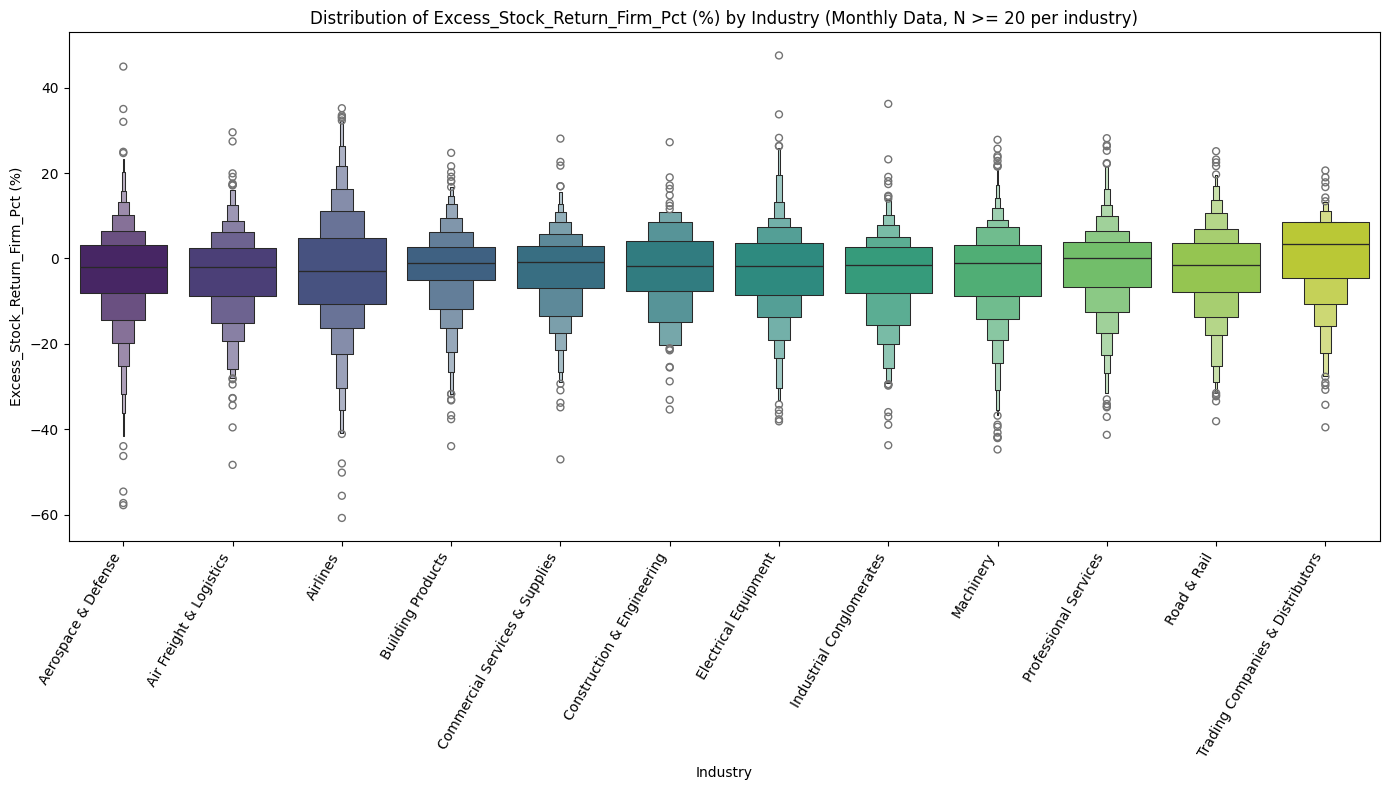

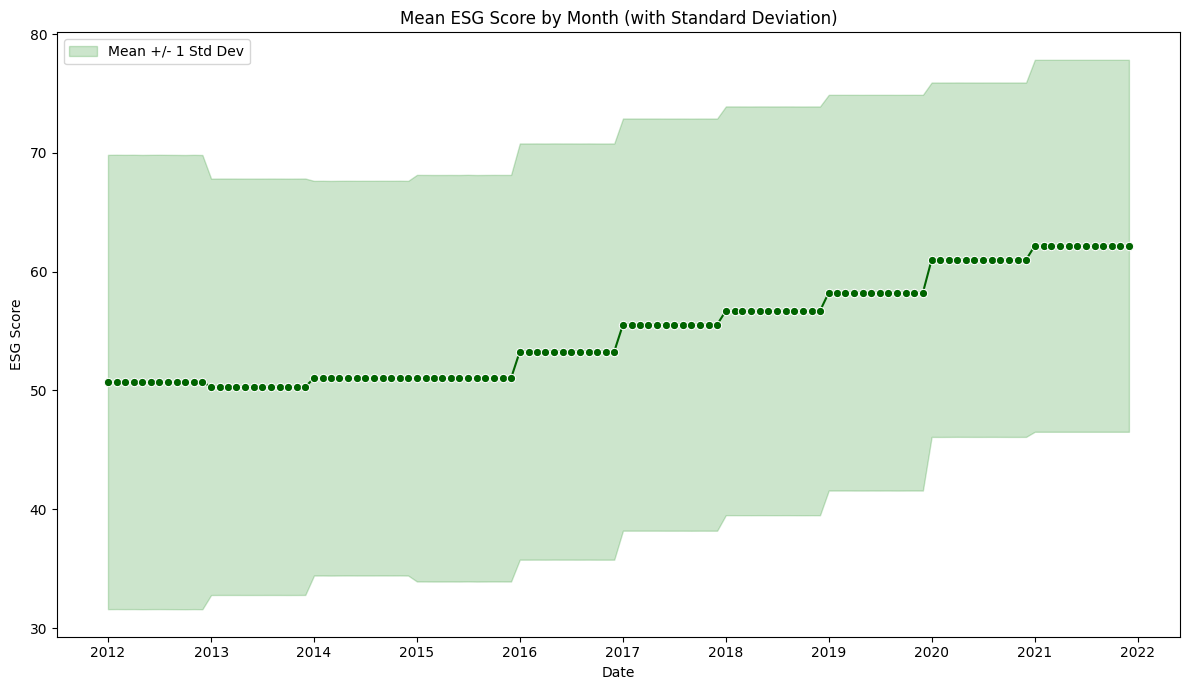


--- Panel Data Analysis (with Robust Standard Errors) ---
Dependent Variable: Excess_Stock_Return_Firm (Excess Stock Returns)
Independent Variables (for Pooled/Entity FE/Random Effects): ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2', 'ESG_PC1']
Independent Variables (for Time FE/Two-Way FE, excluding market factors): ['ESG_PC1', 'ESG_score']
Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.

--- Pooled OLS Model (Robust Standard Errors) ---

--- Pooled OLS Model ---
               Coefficient Std. Error    T-stat P-value Lower CI Upper CI
const              -0.0493     0.0011  -45.2307  0.0000  -0.0514  -0.0471
Mkt-RF              1.2879     0.0300   42.9555  0.0000   1.2291   1.3467
SMB                 1.0826     0.0705   15.3567  0.0000   0.9444   1.2208
RMW                 1.4045     0.0856   16.4019  0.0000   1.2367   1.5724
WML                 0.484

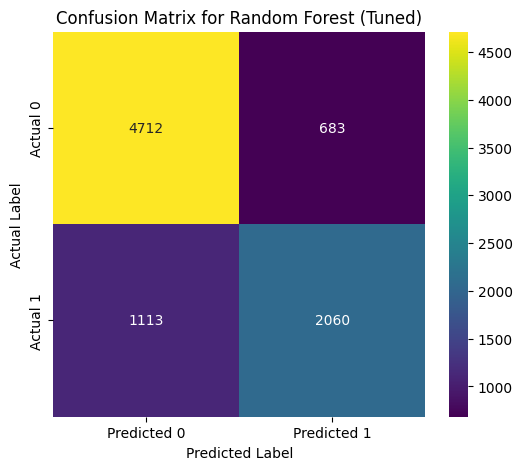

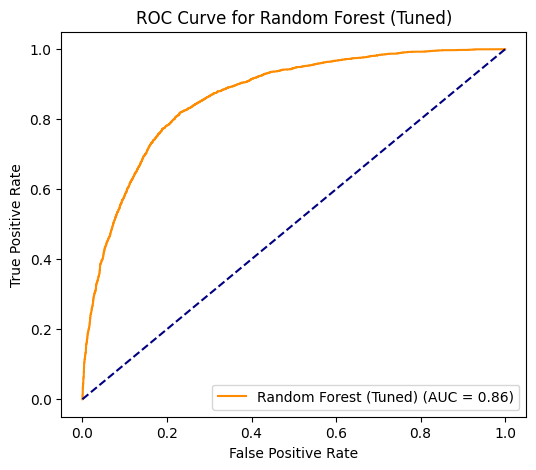


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5395
           1       0.75      0.65      0.70      3173

    accuracy                           0.79      8568
   macro avg       0.78      0.76      0.77      8568
weighted avg       0.79      0.79      0.79      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- XGBoost (Tuned) Consolidated Cross-Validation Metrics ---
Accuracy: 0.7954
Precision: 0.7020
Recall: 0.7775
F1-Score: 0.7378
ROC AUC: 0.8691


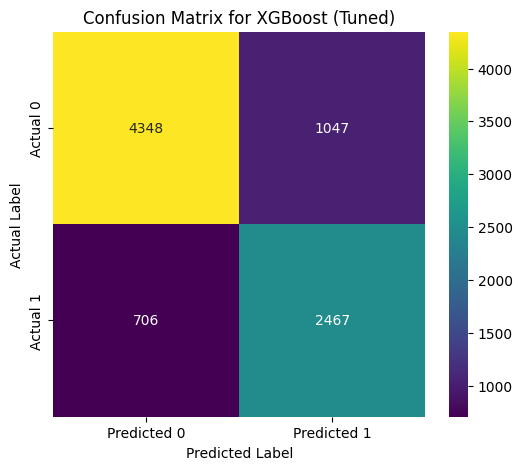

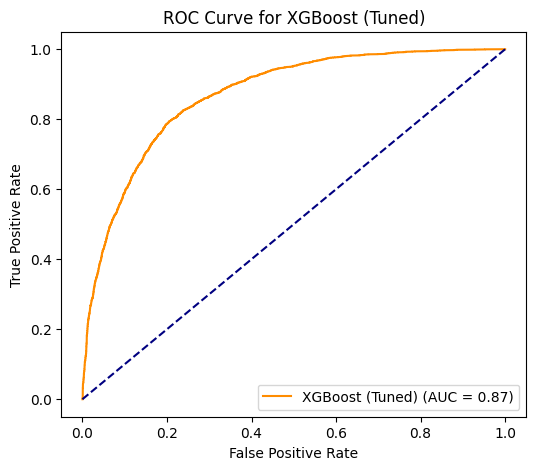


Full Classification Report (Aggregated CV Predictions):
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5395
           1       0.70      0.78      0.74      3173

    accuracy                           0.80      8568
   macro avg       0.78      0.79      0.79      8568
weighted avg       0.80      0.80      0.80      8568

Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.
Consider techniques like SMOTE or class weighting to address imbalance.
------------------------------------------------------------

--- Feature Importance ---
Interpreting key drivers of next month's Excess Return Firm Direction.

Top 10 Feature Importances (Random Forest):
            feature  importance
36   FF_HML_CMA_PC1    0.089513
0            Mkt-RF    0.080588
37   FF_HML_CMA_PC2    0.065075
2               RMW    0.062707
3               WML    0.058082
1               SMB    0.055596
14      QUICK_RATIO    0.019255
20

DEBUG SHAP: X_scaled_ml_df.shape: (8568, 52), X_scaled_ml_df.columns: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'ESG_score']...
DEBUG SHAP: X_shap_summary_sample_df.shape: (500, 52), X_shap_summary_sample_df.columns: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'ESG_score']...
DEBUG SHAP: X_shap_single_instance.shape: (1, 52), X_shap_single_instance.columns: ['Mkt-RF', 'SMB', 'RMW', 'WML', 'ESG_score']...

SHAP Summary Plot (Random Forest): Overall Feature Impact
Error during SHAP analysis for Random Forest: The shape of the shap_values matrix does not match the shape of the provided data matrix.
This often happens due to feature mismatch or memory issues. Ensure `X_shap_summary_sample_df` has the same columns and order as `X_scaled_ml_df`.

SHAP Summary Plot (XGBoost): Overall Feature Impact


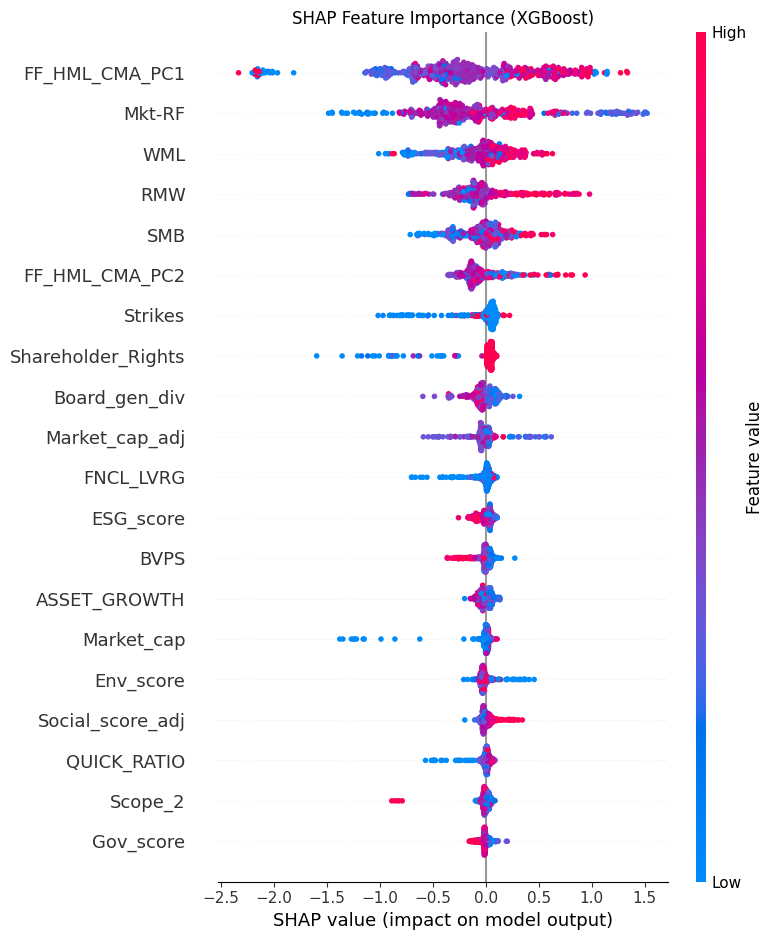


SHAP Dependence Plot (XGBoost): Non-Linearity & Interactions
Plotting dependence for: Strikes


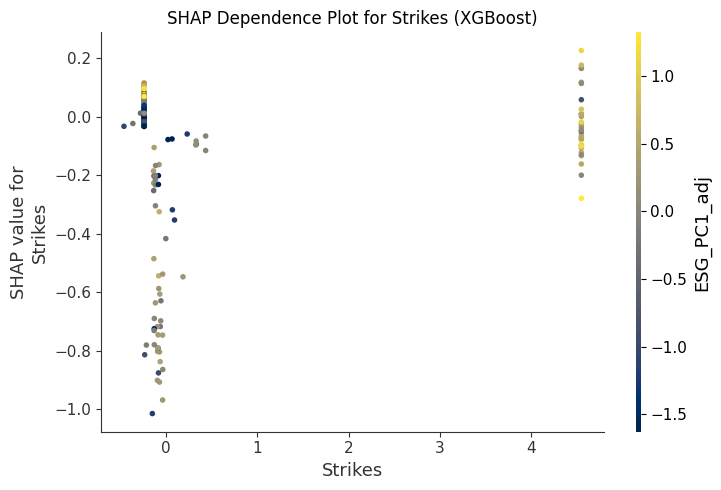

Plotting dependence for: RMW


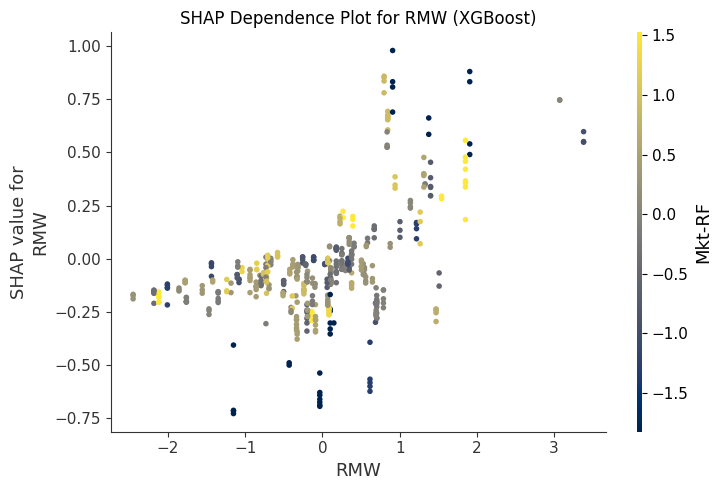

Plotting dependence for: Mkt-RF


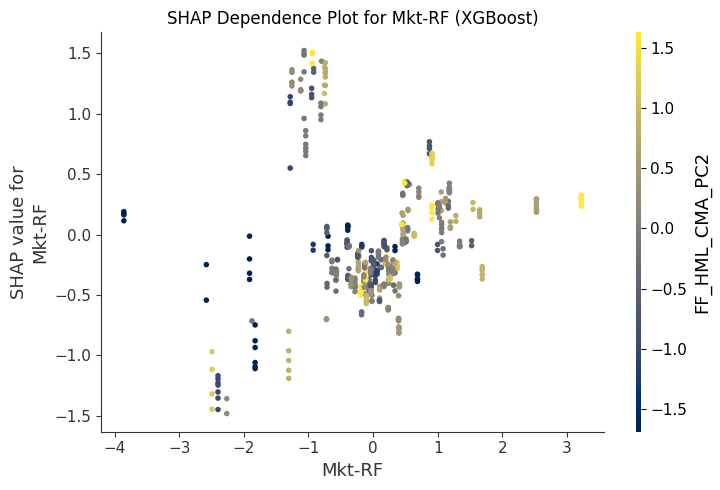


SHAP Force Plot (XGBoost): Explanation for a Single Prediction
Explaining prediction for Identifier: PNR, Date: 2020-10

--- Analysis Complete ---

--- Conceptual Extensions for Future Research ---
1. Alternative Dependent Variables/Research Questions:
   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.
   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.
   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).
2. Expanding Data for Robustness:
   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).
   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.
3. Advanced ML Techniques:
   - Expe

In [1]:
# --- CRITICAL: PLEASE ENSURE YOU RUN ALL CELLS FROM THE VERY TOP OF THE NOTEBOOK ---
# This ensures all necessary libraries are imported and available.
# If you are restarting the runtime, always select "Restart runtime and run all".
# If you are running this code block in isolation, it will fail because imports might not have executed.

# --- CRITICAL: Run this in a SEPARATE CELL and RESTART RUNTIME for updates to take effect ---
# FIX 1: Use --force-reinstall for more aggressive package clearing in Colab.
# Make sure to run this cell, let it finish, then go to "Runtime" -> "Restart runtime"
# After restarting, run ALL cells from the beginning.
#!pip install --upgrade --force-reinstall linearmodels arch statsmodels yfinance pmdarima matplotlib seaborn scikit-learn xgboost shap
# --- End of upgrade commands and runtime restart instruction ---

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, coint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.arima.model import ARIMA # For ARIMA (univariate)
import warnings
import sys # For sys.exit()
import yfinance as yf # For downloading stock data
from datetime import datetime # For handling dates
from scipy.stats import chi2 # For custom Hausman test p-value
from scipy import stats # For Fama-MacBeth p-value (norm.cdf)

# Suppress specific warnings for cleaner output during demonstrations
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', message="Maximum number of iterations has been reached") # For IterativeImputer convergence
warnings.filterwarnings('ignore', message="The default value of `n_init` will change from 10 to 'auto' in 1.4.") # For sklearn
warnings.filterwarnings('ignore', message="It is not recommended to use many iteratives on a dataset that has too many unique values and a large number of rows, as it can be very slow.") # For MICE

# Enable experimental iterative imputer for MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS

# --- CRITICAL FIX FOR linearmodels.panel.diagnostic IMPORT ---
# Place this directly below the standard imports to try and catch the import error early.
_PANEL_DIAGNOSTICS_AVAILABLE = False
try:
    from linearmodels.panel.diagnostic import pesaran_cd, wooldridge_test
    _PANEL_DIAGNOSTICS_AVAILABLE = True
    print("linearmodels.panel.diagnostic successfully imported. Advanced panel diagnostics enabled.")
except ImportError as e:
    print(f"Warning: linearmodels.panel.diagnostic could not be imported. Skipping advanced panel diagnostics. Error: {e}")
    print("ACTION REQUIRED: If you see 'No module named linearmodels.panel.diagnostic' here,")
    print("please run the `!pip install --upgrade --force-reinstall linearmodels ...` cell at the very top,")
    print("then go to 'Runtime' -> 'Restart runtime', and finally 'Run all' cells from the start.")
# --- END CRITICAL FIX FOR linearmodels.panel.diagnostic IMPORT ---

from sklearn.decomposition import PCA # For Principal Component Analysis

# --- ML Specific Imports ---
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- CUSTOM HAUSMAN TEST FUNCTION (Fallback if linearmodels.compare fails) ---
def hausman_test(fe_res, re_res):
    """
    Performs a Hausman test to choose between Fixed Effects and Random Effects models.
    H0: Random Effects model is consistent and efficient (unobserved effects are uncorrelated with regressors).
    H1: Fixed Effects model is consistent, Random Effects is inconsistent (unobserved effects are correlated).
    Prioritizes linearmodels' built-in comparison method.
    """
    if fe_res is None or re_res is None:
        print("Hausman test skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        return

    print(f"\n--- Hausman Test (Fixed vs. Random Effects) ---")

    # Try linearmodels' built-in compare first
    if _PANEL_DIAGNOSTICS_AVAILABLE:
        try:
            # Check if fe_res and re_res are from the same base model (same dependent/independent variables)
            if fe_res.model.dependent.dataframe.columns.tolist() == re_res.model.dependent.dataframe.columns.tolist() and \
               fe_res.model.exog.dataframe.columns.tolist() == re_res.model.exog.dataframe.columns.tolist():

                hausman_comparison = fe_res.compare(re_res)
                # linearmodels compare automatically includes Hausman if applicable
                if 'Hausman' in hausman_comparison.tests:
                    hausman_test_result = hausman_comparison.tests['Hausman']
                    hausman_pvalue = hausman_test_result.pvalue
                    hausman_stat = hausman_test_result.stat
                    print(f"\n--- Linearmodels Built-in Hausman Test Results ---")
                    print(hausman_test_result) # Prints full test details
                    if hausman_pvalue < 0.05:
                        print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                    else:
                        print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")
                    return # Exit if built-in test succeeds
                else:
                    print("Linearmodels built-in Hausman test results not found in the comparison object. Falling back to custom.")
            else:
                print("Models (FE and RE) have different independent variables or dependent variables. Built-in Hausman test requires comparable models. Falling back to custom if possible.")
        except Exception as e:
            print(f"Error with linearmodels built-in Hausman test: {e}. Falling back to custom.")

    # Custom implementation as a fallback (less robust than built-in, especially with robust errors)
    # Filter coefficients that are common and should be identical under H0
    common_params = list(set(fe_res.params.index) & set(re_res.params.index))

    # Exclude 'const' from common parameters for the Hausman test
    if 'const' in common_params:
        common_params.remove('const')

    if not common_params:
        print("No common non-constant parameters to perform custom Hausman test. Test cannot be performed.")
        return

    b_fe_common = fe_res.params[common_params].to_numpy()
    b_re_common = re_res.params[common_params].to_numpy()

    # Get covariance matrices for common parameters
    # Note: Using robust covariance matrices here is problematic for custom Hausman test
    # The standard Hausman test assumes efficient estimator's covariance is difference of the two.
    # When using robust errors, this assumption often breaks. Linearmodels' built-in handles this better.
    cov_fe_common = fe_res.cov.loc[common_params, common_params]
    cov_re_common = re_res.cov.loc[common_params, common_params]

    b_diff = b_fe_common - b_re_common
    cov_diff = cov_fe_common - cov_re_common

    try:
        # Check for positive definiteness for inversion stability
        eigenvalues = np.linalg.eigvalsh(cov_diff)
        if np.any(eigenvalues < -1e-8):
            print("Warning: Variance difference matrix is not positive semi-definite (negative eigenvalues found). Custom Hausman test results may be unreliable or invalid.")
            print("This often indicates that the Random Effects model is inconsistent or that assumptions are violated.")
            print("Fixed Effects model is generally preferred if this occurs, or use built-in Hausman test with appropriate options if available.")
            # Add a small regularization term to make it invertible for calculation, but note the warning
            cov_diff += np.eye(cov_diff.shape[0]) * 1e-6 # Small regularization for numerical stability

        inv_cov_diff = np.linalg.inv(cov_diff)
    except np.linalg.LinAlgError as e:
        print(f"Error inverting covariance difference matrix for custom Hausman test: {e}")
        print("This usually means the matrix is singular or not positive semi-definite. Custom Hausman test is not valid.")
        print("If this occurs, Fixed Effects model is typically preferred (as it's consistent even if RE isn't efficient).")
        return

    hausman_stat = b_diff.T @ inv_cov_diff @ b_diff
    df = len(common_params)

    p_value = chi2.sf(hausman_stat, df)

    print(f"\n--- Custom Hausman Test Results (Fallback) ---")
    print(f"Hausman Test Statistic: {hausman_stat:.4f}")
    print(f"Degrees of Freedom: {df}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Decision: Reject H0. Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
    else:
        print("Decision: Fail to reject H0. Random Effects model is preferred (unobserved effects are not correlated with regressors).")

# --- END CUSTOM HAUSMAN TEST FUNCTION ---


# Manual Fama-MacBeth function (fallback for linearmodels.asset_pricing.FamaMacBeth)
def run_manual_fama_macbeth(data_df, dependent_var, factors_list):
    """
    Performs a Fama-MacBeth two-stage regression.
    Step 1: Time-series regression for each firm to estimate factor betas.
    Step 2: Cross-sectional regression for each time period to estimate risk premia,
            then average these premia over time and calculate their t-statistics.
    """
    print(f"\n--- Running Manual Fama-MacBeth Regression for {dependent_var} ---")
    print("This analysis is now running on monthly data, which is the standard frequency for Fama-MacBeth regressions in asset pricing studies.")

    # Ensure data_df has Identifier (RIC) and Date (monthly) in index for grouping
    if not isinstance(data_df.index, pd.MultiIndex) or 'Identifier (RIC)' not in data_df.index.names or 'Date' not in data_df.index.names:
        print("Error: Input data_df for Fama-MacBeth must have a MultiIndex with 'Identifier (RIC)' and 'Date'.")
        return None

    current_factors_list = []
    for factor in factors_list:
        if factor not in data_df.columns:
            print(f"Warning: Factor '{factor}' not found in data for Fama-MacBeth. Excluding.")
            continue
        if data_df[factor].std() == 0:
            print(f"Warning: Factor '{factor}' has zero variance and will be excluded from Fama-MacBeth.")
            continue
        current_factors_list.append(factor)

    if not current_factors_list:
        print("No valid factors remaining for Fama-MacBeth after checks.")
        return None

    if dependent_var not in data_df.columns:
        print(f"Error: Dependent variable '{dependent_var}' not found in data for Fama-MacBeth.")
        return None

    # Step 1: Run time-series regressions for each firm to get betas
    betas_per_firm_list = []
    unique_firms = data_df.index.get_level_values('Identifier (RIC)').unique()

    print(f"Step 1: Estimating Betas for {len(unique_firms)} firms...")
    for ric_id in unique_firms:
        firm_data = data_df.loc[ric_id]

        # Ensure relevant columns are present for the firm's data slice and drop NaNs
        firm_data_subset = firm_data[[dependent_var] + current_factors_list].dropna()

        # For monthly data, usually need at least T > N (num factors) + 1 for time-series regressions
        if len(firm_data_subset) < len(current_factors_list) + 2:
            continue

        y = firm_data_subset[dependent_var]
        X = sm.add_constant(firm_data_subset[current_factors_list])

        try:
            model = sm.OLS(y, X)
            results = model.fit()

            # Rename coefficients to clearly indicate they are betas (e.g., Mkt-RF_beta)
            betas = results.params.drop('const', errors='ignore')
            betas = betas.rename(lambda x: f'{x}_beta') # Add _beta suffix

            betas['Identifier (RIC)'] = ric_id
            betas_per_firm_list.append(betas)

        except Exception as e:
            continue

    if not betas_per_firm_list:
        print("No successful time-series regressions. Cannot proceed with Fama-MacBeth.")
        return None

    betas_df = pd.DataFrame(betas_per_firm_list).set_index('Identifier (RIC)')
    print(f"Successfully estimated betas for {len(betas_df)} firms.")

    # Get the names of the new beta columns (e.g., 'Mkt-RF_beta')
    beta_cols = [f'{f}_beta' for f in current_factors_list]


    # Step 2: Run cross-sectional regressions for each time period
    merged_with_betas = data_df.copy()
    merged_with_betas = merged_with_betas.join(betas_df[beta_cols], how='left') # join on index by default

    risk_premia_list = []
    unique_dates = merged_with_betas.index.get_level_values('Date').unique().sort_values()

    print(f"Step 2: Estimating Risk Premia for {len(unique_dates)} months...")
    for date in unique_dates:
        # Select data for the current cross-section
        cross_section_data = merged_with_betas.loc[(slice(None), date), :]

        # Dropna based on the dependent variable and the beta columns
        cross_section_data_clean = cross_section_data[[dependent_var] + beta_cols].dropna()

        if len(cross_section_data_clean) < len(beta_cols) + 1:
            continue

        y_cs = cross_section_data_clean[dependent_var]
        X_cs = sm.add_constant(cross_section_data_clean[beta_cols])

        try:
            model_cs = sm.OLS(y_cs, X_cs)
            results_cs = model_cs.fit()

            premia = results_cs.params.copy()
            premia.name = date # Name the series by date
            risk_premia_list.append(premia)

        except Exception as e:
            continue

    if not risk_premia_list:
        print("No successful cross-sectional regressions. Cannot calculate Fama-MacBeth risk premia.")
        return None

    risk_premia_ts = pd.DataFrame(risk_premia_list)
    # Ensure all factor columns are present, filling with NaN for years where they weren't in the regression
    all_premia_cols = sorted(list(set(col for df in risk_premia_list for col in df.index)))
    risk_premia_ts = risk_premia_ts.reindex(columns=all_premia_cols)

    # Step 3: Average risk premia and calculate t-statistics
    mean_premia = risk_premia_ts.mean()
    std_errors_premia = risk_premia_ts.std() / np.sqrt(len(risk_premia_ts))

    t_stats_premia = mean_premia / std_errors_premia.replace(0, np.nan)

    # Combine results
    results_dict = {
        'Factor': mean_premia.index.tolist(),
        'Mean Premium': mean_premia.tolist(),
        'Std.Error (FM)': std_errors_premia.tolist(),
        'T-statistic (FM)': t_stats_premia.tolist()
    }

    results_df = pd.DataFrame(results_dict)
    results_df['P-value (FM)'] = results_df['T-statistic (FM)'].apply(lambda x: 2 * (1 - stats.norm.cdf(abs(x))))

    print("\nFama-MacBeth Regression Results:")
    return results_df

# --- END Manual Fama-MacBeth Function ---

# --- Function to display model results in a table ---
def display_model_results_table(model_results, title="Model Results"):
    """Displays a model's parameter estimates in a formatted table."""
    if model_results is None:
        print(f"\nNo results available for {title}.")
        return

    print(f"\n--- {title} ---")

    # Extract data for table
    params_df = model_results.params.to_frame(name='Coefficient')
    params_df['Std. Error'] = model_results.std_errors
    params_df['T-stat'] = model_results.tstats
    params_df['P-value'] = model_results.pvalues

    # Add confidence intervals if available
    if hasattr(model_results, 'conf_int'):
        ci = model_results.conf_int()
        params_df['Lower CI'] = ci.iloc[:, 0]
        params_df['Upper CI'] = ci.iloc[:, 1]

    # Format for display
    formatted_params = params_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, (float, np.number)) else str(x))
    print(formatted_params.to_string())

    print(f"\nR-squared (Within): {model_results.rsquared_within:.4f}")
    if hasattr(model_results, 'rsquared_between'):
        print(f"R-squared (Between): {model_results.rsquared_between:.4f}")
    if hasattr(model_results, 'rsquared_overall'):
        print(f"R-squared (Overall): {model_results.rsquared_overall:.4f}")

    # Check for f_statistic existence and value before accessing .stat and .pval
    if hasattr(model_results, 'f_statistic') and model_results.f_statistic is not None:
        if hasattr(model_results.f_statistic, 'stat') and hasattr(model_results.f_statistic, 'pval'):
            print(f"F-statistic: {model_results.f_statistic.stat:.2f} (P-value: {model_results.f_statistic.pval:.4f})")
        else:
            print("F-statistic: Not applicable or detailed statistics not available for this model.")
    else:
        print("F-statistic: Not available for this model type.")

    print(f"No. Observations: {model_results.nobs}")

    # Handle different attribute names for num_entities and num_time_periods based on linearmodels results object types
    if hasattr(model_results, 'num_entities'):
        print(f"Entities: {model_results.num_entities}")
    elif hasattr(model_results, 'no_individuals'): # For PanelEffectsResults
        print(f"Entities: {model_results.no_individuals}")
    else:
        print("Entities: Not available.")

    if hasattr(model_results, 'num_time_periods'):
        print(f"Time Periods: {model_results.num_time_periods}")
    elif hasattr(model_results, 'no_time_periods'): # For PanelEffectsResults
        print(f"Time Periods: {model_results.no_time_periods}")
    else:
        print("Time Periods: Not available.")

    if hasattr(model_results, 'included_effects'):
        print(f"Included Effects: {', '.join(model_results.included_effects)}")
    print("-" * 60)
# --- End Function to display model results in a table ---


# --- 0. Define Companies for Stock Data Download ---
COMPANY_TICKERS = [
    'AAL', 'ALK', 'DAL', 'LUV', 'UAL', # Airlines
    'BA', 'GD', 'HII', 'HWM', 'LHX', 'LMT', 'NOC', 'RTX', 'TDG', 'TXT', # Aerospace & Defense
    'CAT', 'CMI', 'DE', 'PCAR', # Heavy Machinery & Equipment
    'CSX', 'NSC', 'UNP', # Rail Transportation
    'CHRW', 'EXPD', 'FDX', 'JBHT', 'ODFL', 'UPS', # Freight & Logistics Services
    'ALLE', 'AOS', 'CARR', 'FBHS', 'JCI', 'MAS', 'OTIS', 'TT', # Building Products & Security
    'MMM', 'GE', 'HON', # Industrial Conglomerates
    'CPRT', 'CTAS', 'EFX', 'NLSN', 'RHI', 'ROL', 'VRSK', # Business Services
    'RSG', 'WM', # Environmental & Waste Management
    'AME', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GNRC', 'GWW', 'IEX', 'IR', 'ITW', 'NDSN', 'PH', 'PNR', 'ROK', 'SNA', 'SWK', 'WAB', 'XYL', # Diversified Industrials
    'J', 'LDOS', 'PWR', 'ROP' # Engineering & Construction
]

# --- 1. Load and Preprocess Data ---

# Load Fama-French 5 Factors data
try:
    ff_df = pd.read_csv('/content/ff_5_Factors.csv')
    # --- IMPORTANT CHANGE: Load monthly ESG data ---
    esg_df = pd.read_csv('/content/monthly_esg_data.csv')
except FileNotFoundError:
    print("Ensure 'ff_5_Factors.csv' and 'monthly_esg_data.csv' are in the correct path.")
    sys.exit(1)

print("--- Data Loading Complete ---")
print("Fama-French Data Head (Monthly):\n", ff_df.head())
print("\nESG Data Head (Monthly):\n", esg_df.head())

# --- Fama-French Data Preprocessing (already monthly, just convert to proper date format) ---
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m')
ff_df['Year'] = ff_df['Date'].dt.year
ff_df['Month'] = ff_df['Date'].dt.month # Keep month for monthly returns

all_possible_factor_cols = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
factor_cols = list(set(all_possible_factor_cols).intersection(ff_df.columns))

# Ensure factors are in decimal form (already monthly, conversion if max > 1)
for col in factor_cols:
    if col in ff_df.columns and ff_df[col].dtype in ['float64', 'int64'] and ff_df[col].max() > 1:
        ff_df[col] = ff_df[col] / 100.0

# No longer creating ff_annual, as we are moving to monthly analysis


# --- ESG Data Preprocessing (now monthly) ---
esg_df.rename(columns={'Date': 'Date_str'}, inplace=True) # Rename to avoid conflict with datetime 'Date'
# ESG dates are already parsed to YYYY-MM-01 format, e.g., '2021/01' becomes '2021-01-01'
esg_df['Date'] = pd.to_datetime(esg_df['Date_str'], format='%Y/%m') # Parse as monthly date
esg_df['Year'] = esg_df['Date'].dt.year
esg_df['Month'] = esg_df['Date'].dt.month
esg_df.dropna(subset=['Identifier (RIC)', 'Date'], inplace=True)


if 'Industry' not in esg_df.columns:
    print("Warning: 'Industry' column not found in ESG data. Cannot perform industry-adjusted feature engineering.")

numeric_cols_esg = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'BVPS', 'Market_cap', 'Shares',
                    'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG',
                    'PE_RATIO', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
                    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
                    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
                    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives', 'Total_assets']

for col in numeric_cols_esg:
    if col in esg_df.columns:
        esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')


print(f"\nESG Years & Months (unique, type {esg_df['Date'].dtype}): {sorted(esg_df['Date'].dropna().unique())[::12]} (showing one per year)")
print(f"FF Data Years & Months (unique, type {ff_df['Date'].dtype}): {sorted(ff_df['Date'].unique())[::12]} (showing one per year)")


# --- Download and Preprocess Historical Stock Prices (now for monthly returns) ---
print("\n--- Downloading Historical Stock Prices ---")
stock_data_raw = pd.DataFrame()
# Align start/end dates with the earliest/latest monthly data available
start_date_ff = ff_df['Date'].min()
end_date_ff = ff_df['Date'].max()

# Adjust stock data download range to cover FF and ESG data
start_date_download = min(start_date_ff, esg_df['Date'].min())
end_date_download = max(end_date_ff, esg_df['Date'].max()) + pd.DateOffset(months=1) # Ensure we get enough data for last month's return

try:
    stock_data_raw = yf.download(COMPANY_TICKERS, start=start_date_download, end=end_date_download, progress=False)
except Exception as e:
    print(f"Error downloading stock data: {e}")
    sys.exit(1)

if stock_data_raw.empty:
    raise ValueError("No stock data downloaded. Cannot proceed with market return analysis.")

# FIX: Corrected syntax error: removed duplicated 'col'
available_tickers = [col[1] for col in stock_data_raw.columns if col[0] == 'Close']
if not available_tickers:
    print("Warning: No 'Close' price data found for any ticker. Cannot proceed with stock return calculation.")
    sys.exit(1)

print(f"\nSuccessfully downloaded data for {len(available_tickers)} out of {len(COMPANY_TICKERS)} tickers (based on 'Close' price availability).")

# Select only the 'Close' prices and unstack to long format
stock_prices_close = stock_data_raw['Close'].stack().reset_index()
stock_prices_close.columns = ['Date', 'Identifier (RIC)', 'Close_Price']

print("Stock Prices (Close) Head:\n", stock_prices_close.head())

# FIX 2: Correct Monthly Returns Calculation and Date Alignment
# Calculate Monthly Returns from Close prices (end of month to end of month)
stock_prices_close['Date'] = pd.to_datetime(stock_prices_close['Date']) # Ensure Date is datetime
stock_prices_close.set_index('Date', inplace=True) # Set Date as index for resampling

monthly_prices_list = []
for ric_id, group_df in stock_prices_close.groupby('Identifier (RIC)'):
    # Resample to month-end, taking the last price of the month
    # This will result in month-end dates (e.g., 2012-02-29, 2012-03-31)
    monthly_series = group_df['Close_Price'].resample('M').last()
    monthly_prices_list.append(monthly_series.to_frame(name='Close_Price_Monthly').assign(**{'Identifier (RIC)': ric_id}))

monthly_prices = pd.concat(monthly_prices_list).reset_index()
monthly_prices.sort_values(by=['Identifier (RIC)', 'Date'], inplace=True)

monthly_stock_returns_processed = []
for ric_id, group_df in monthly_prices.groupby('Identifier (RIC)'):
    # Calculate monthly return as (current_month_price / previous_month_price) - 1
    # The return calculated for month M will be on the row with month M's end date.
    group_df['Monthly_Stock_Return'] = group_df['Close_Price_Monthly'].pct_change()

    # CRITICAL DATE ALIGNMENT STEP: Convert month-end dates to month-start dates
    # to match the ESG and Fama-French data.
    # E.g., a return computed for Feb 29, 2012 (based on Jan 31 price) should be
    # associated with '2012-02-01' to merge with '2012-02-01' ESG/FF data.
    group_df['Date_Aligned'] = group_df['Date'].dt.to_period('M').dt.start_time

    group_df['Year'] = group_df['Date_Aligned'].dt.year
    group_df['Month'] = group_df['Date_Aligned'].dt.month
    monthly_stock_returns_processed.append(group_df[['Date_Aligned', 'Identifier (RIC)', 'Year', 'Month', 'Monthly_Stock_Return']])

monthly_stock_returns = pd.concat(monthly_stock_returns_processed).dropna(subset=['Monthly_Stock_Return'])
monthly_stock_returns.rename(columns={'Date_Aligned': 'Date'}, inplace=True) # Rename back to 'Date' for merging

print("\nMonthly Stock Returns Head (true monthly, aligned to month-start):\n", monthly_stock_returns.head())


# --- Merge Dataframes: ESG (monthly) + Stock Returns (monthly) + Fama-French (monthly) ---
# Merge ESG with monthly stock returns
esg_with_returns_df = pd.merge(esg_df, monthly_stock_returns, on=['Identifier (RIC)', 'Date', 'Year', 'Month'], how='left')

# Merge with Fama-French data (which is already monthly)
# We need to ensure ff_df has the same 'Year' and 'Month' columns for merging, and 'RF'
ff_for_merge = ff_df[['Date', 'Year', 'Month', 'RF']].copy() if 'RF' in ff_df.columns else ff_df[['Date', 'Year', 'Month']].copy()
# Add RF column if it doesn't exist to avoid key error later, will be NaN
if 'RF' not in ff_for_merge.columns:
    ff_for_merge['RF'] = np.nan

merged_df = pd.merge(esg_with_returns_df, ff_for_merge, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_ff'))

# Handle cases where RF_ff might have been created due to suffix, but we want the original RF
if 'RF_ff' in merged_df.columns:
    merged_df['RF'] = merged_df['RF_ff']
    merged_df.drop(columns=['RF_ff'], inplace=True)


# --- Calculate Excess Stock Return of the Firm (monthly) ---
if 'Monthly_Stock_Return' in merged_df.columns and 'RF' in merged_df.columns:
    merged_df['Excess_Stock_Return_Firm'] = merged_df['Monthly_Stock_Return'] - merged_df['RF']
    merged_df['Excess_Stock_Return_Firm_Pct'] = merged_df['Excess_Stock_Return_Firm'] * 100.0
else:
    print("Warning: 'Excess_Stock_Return_Firm' cannot be calculated. Ensure 'Monthly_Stock_Return' and 'RF' are available.")
    merged_df['Excess_Stock_Return_Firm'] = np.nan
    merged_df['Excess_Stock_Return_Firm_Pct'] = np.nan

# Now merge with Fama-French factors (excluding RF as it's already used)
non_rf_factor_cols_current = [col for col in factor_cols if col != 'RF']
ff_factors_only = ff_df[['Date', 'Year', 'Month'] + non_rf_factor_cols_current].copy()

final_df = pd.merge(merged_df, ff_factors_only, on=['Date', 'Year', 'Month'], how='left', suffixes=('', '_factors'))

# Handle potential duplicate factor columns (e.g., if ESG had a column with same name as FF factor)
for col in non_rf_factor_cols_current:
    if f'{col}_factors' in final_df.columns:
        # Prioritize factor data from ff_df if there's a conflict
        final_df[col] = final_df[f'{col}_factors']
        final_df.drop(columns=[f'{col}_factors'], inplace=True)


# Define independent variables for panel regressions and ML.
# Ensure 'Date_str' is removed as it's not needed after parsing
if 'Date_str' in final_df.columns:
    final_df.drop(columns=['Date_str'], inplace=True)

# --- CRITICAL FIX START: Set the MultiIndex for final_df BEFORE imputation ---
# This resolves the KeyError by ensuring final_df has the correct index structure
# when imputed values are assigned back using .loc and is ready for panel models.
final_df = final_df.set_index(['Identifier (RIC)', 'Date']).sort_index()
# --- CRITICAL FIX END ---

all_panel_independent_options = [
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
# Filter out columns that are no longer present or are utility columns
all_panel_independent_options = [col for col in all_panel_independent_options if col in final_df.columns]


dependent_var = 'Excess_Stock_Return_Firm'
dependent_var_pct = 'Excess_Stock_Return_Firm_Pct'

print("\n--- Merged Data Head (ESG, Stock Returns, and Fama-French - Monthly) ---\n", final_df.head())
print("\nMissing values before imputation (in final_df):\n", final_df.isnull().sum()[final_df.isnull().sum() > 0])


# --- 2. MICE Imputation ---
# Using the now monthly 'final_df' for imputation
cols_for_imputation = [
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score',
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML',
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'RF', 'Monthly_Stock_Return', 'Excess_Stock_Return_Firm',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use',
    'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives'
]
cols_for_imputation = [col for col in cols_for_imputation if col in final_df.columns]

# imputable_df_temp no longer needs to set index, as final_df already has it.
# Select only the columns needed for imputation, maintaining the existing MultiIndex.
imputable_df_temp = final_df[cols_for_imputation].copy()

threshold = 0.8
cols_to_drop_from_imputation = [col for col in imputable_df_temp.columns if imputable_df_temp[col].isnull().sum() / len(imputable_df_temp) > threshold]
imputable_df_clean = imputable_df_temp.drop(columns=cols_to_drop_from_imputation)

if not imputable_df_clean.empty and len(imputable_df_clean.columns) > 0:
    imputer = IterativeImputer(max_iter=10, random_state=0)
    # Perform imputation, result is a numpy array
    imputed_data = imputer.fit_transform(imputable_df_clean)
    # Convert back to DataFrame, preserving original index and columns
    imputed_df = pd.DataFrame(imputed_data, columns=imputable_df_clean.columns, index=imputable_df_clean.index)

    # Update original final_df with imputed values
    for col in imputed_df.columns:
        # Use .loc to assign values back to the original DataFrame by index alignment
        final_df.loc[imputed_df.index, col] = imputed_df[col]

else:
    print("\nWarning: No suitable numerical columns found for MICE imputation or imputable_df_clean is empty.")


# Handle remaining NaNs after MICE (ffill/bfill for panel, then mean/median)
# final_df already has the MultiIndex from the "CRITICAL FIX" section.
# Apply ffill/bfill within each entity (firm) across time
final_df = final_df.groupby(level='Identifier (RIC)').ffill().bfill()

# Fill any remaining NaNs (e.g., if a column was all NaN for some firms, or at start/end)
for col in final_df.columns:
    if final_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(final_df[col]):
            final_df[col] = final_df[col].fillna(final_df[col].mean())
        else:
            # For categorical data, use mode. Handle potential empty mode.
            final_df[col] = final_df[col].fillna(final_df[col].mode()[0] if not final_df[col].mode().empty else 'Unknown')


print("\n--- Missing values after MICE and ffill/bfill (before final model-specific drop) ---")
print(final_df.isnull().sum()[final_df.isnull().sum() > 0])


# Final dropna for critical columns right before model fitting
# This is usually for the dependent variable and key independent variables that cannot be NaN
essential_cols_for_model = [dependent_var] + [col for col in all_panel_independent_options if col != 'Industry'] # Exclude 'Industry' if it might be categorical and handled separately
initial_rows_count = len(final_df)

# --- DEBUG & Robustness Check for KeyError ---
print(f"DEBUG: Columns in final_df immediately before final dropna: {final_df.columns.tolist()}")
print(f"DEBUG: Does '{dependent_var}' exist in final_df columns? {dependent_var in final_df.columns}")

if final_df.empty:
    raise ValueError("DataFrame is empty after preprocessing. Cannot proceed with analysis.")

if dependent_var not in final_df.columns:
    raise ValueError(f"Dependent variable '{dependent_var}' is missing from the DataFrame. Available columns: {final_df.columns.tolist()}")

# The previous error was here because Monthly_Stock_Return (and thus Excess_Stock_Return_Firm) was all NaN
if final_df[dependent_var].isnull().all() or len(final_df[dependent_var].dropna()) < 10:
    raise ValueError(f"Dependent variable '{dependent_var}' is all NaN or has insufficient non-NaN data after critical NaN handling. Cannot proceed with analysis.")

try:
    final_df.dropna(subset=essential_cols_for_model, inplace=True)
    dropped_rows_count = initial_rows_count - len(final_df)
    print(f"\nDropped {dropped_rows_count} rows due to NaNs in essential model-specific columns (excluding Industry if categorical).")
except KeyError as e:
    print(f"\nERROR: A KeyError occurred during final dropna: {e}")
    print(f"This indicates one or more columns in 'essential_cols_for_model' are missing from the DataFrame.")
    missing_cols_identified = [col for col in essential_cols_for_model if col not in final_df.columns]
    print(f"Specifically missing columns: {missing_cols_identified}")
    sys.exit(1) # Exit to prevent further errors


# Ensure Industry column is categorical if it exists
if 'Industry' in final_df.columns:
    final_df['Industry'] = final_df['Industry'].astype('category')

print("\nFinal Data Head after Preprocessing and Imputation (ready for models - Monthly):\n", final_df.head())
print("Shape of final_df:", final_df.shape)
print(f"Dependent variable ({dependent_var}) NaNs: {final_df[dependent_var].isnull().sum()}")


# --- Implement Recommendations & RQ-driven analysis ---

# Recommendation 1: Refine ESG Factor Construction (Value-weighted Market ESG Factor & PCA)
# For monthly data, this is still valid, though the aggregation level becomes monthly
if 'Market_cap' in final_df.columns and 'ESG_score' in final_df.columns:
    vw_esg_df = final_df.reset_index().copy() # Reset index for correct aggregation on 'Date'
    vw_esg_df['Market_cap_weighted_ESG'] = vw_esg_df['ESG_score'] * vw_esg_df['Market_cap']
    # Group by Date (monthly) to get monthly value-weighted factor
    market_esg_factor_vw = vw_esg_df.groupby('Date').apply(lambda x: x['Market_cap_weighted_ESG'].sum() / x['Market_cap'].sum(), include_groups=False)\
                                    .rename('Market_ESG_Factor_VW').reset_index()
    print("\n--- Value-weighted Monthly Market ESG Factor Head ---\n", market_esg_factor_vw.head())
else:
    print("\nWarning: Skipping Value-weighted Market ESG Factor calculation. 'Market_cap' or 'ESG_score' not found.")
    market_esg_factor_vw = pd.DataFrame(columns=['Date', 'Market_ESG_Factor_VW'])


esg_sub_scores = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score']
esg_sub_scores_for_pca = [col for col in esg_sub_scores if col in final_df.columns and final_df[col].std() > 0]
if len(esg_sub_scores_for_pca) >= 2:
    print(f"\n--- Performing PCA on firm-level ESG sub-scores: {esg_sub_scores_for_pca} ---")
    pca_esg_data = final_df[esg_sub_scores_for_pca].copy()

    scaler_esg_pca = StandardScaler()
    scaled_esg_data = scaler_esg_pca.fit_transform(pca_esg_data)

    pca_esg = PCA(n_components=1)
    final_df['ESG_PC1'] = pca_esg.fit_transform(scaled_esg_data)
    print(f"Explained variance ratio of ESG_PC1: {pca_esg.explained_variance_ratio_[0]:.4f}")
else:
    print(f"\nSkipping PCA for ESG sub-scores: Not enough suitable columns (needs >=2 non-constant columns). Available: {esg_sub_scores_for_pca}")
    if 'ESG_score' in final_df.columns:
        final_df['ESG_PC1'] = final_df['ESG_score']
    else:
        final_df['ESG_PC1'] = np.nan


# Recommendation 2: Address Multicollinearity (HML and CMA)
ff_factors_for_pca = ['HML', 'CMA']
ff_factors_for_pca_clean = [col for col in ff_factors_for_pca if col in final_df.columns and final_df[col].std() > 0]

if len(ff_factors_for_pca_clean) >= 2:
    print(f"\n--- Performing PCA on Fama-French factors for multicollinearity: {ff_factors_for_pca_clean} ---")
    ff_pca_components = 2
    pca_ff_data = final_df[ff_factors_for_pca_clean].copy()

    scaler_ff_pca = StandardScaler()
    scaled_ff_data = scaler_ff_pca.fit_transform(pca_ff_data)

    pca_ff = PCA(n_components=min(ff_pca_components, len(ff_factors_for_pca_clean)))
    ff_pcs = pca_ff.fit_transform(scaled_ff_data)

    final_df['FF_HML_CMA_PC1'] = ff_pcs[:, 0]
    if ff_pcs.shape[1] > 1:
        final_df['FF_HML_CMA_PC2'] = ff_pcs[:, 1]
        print(f"Explained variance ratios for FF_HML_CMA_PC1: {pca_ff.explained_variance_ratio_[0]:.4f}, FF_HML_CMA_PC2: {pca_ff.explained_variance_ratio_[1]:.4f}")
    else:
        print(f"Only one principal component extracted for FF HML/CMA.")
        final_df['FF_HML_CMA_PC2'] = np.nan

    print("\n--- VIF Check with PCA-derived HML/CMA factors ---")
    independent_vars_panel = ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1']
    if 'FF_HML_CMA_PC2' in final_df.columns and final_df['FF_HML_CMA_PC2'].std() > 0:
        independent_vars_panel.append('FF_HML_CMA_PC2')
    # Prefer ESG_PC1 over ESG_score if available
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel.append('ESG_score')


    vif_features_clean = [col for col in independent_vars_panel if col in final_df.columns and final_df[col].std() > 0]

    if len(vif_features_clean) > 0:
        X_vif_pca_ff = final_df[vif_features_clean].copy()
        X_vif_pca_ff_with_const = sm.add_constant(X_vif_pca_ff, has_constant='add')

        scaler_vif = StandardScaler()
        X_vif_pca_ff_scaled_values = scaler_vif.fit_transform(X_vif_pca_ff_with_const)
        X_vif_pca_ff_scaled_df = pd.DataFrame(X_vif_pca_ff_scaled_values, columns=X_vif_pca_ff_with_const.columns, index=X_vif_pca_ff_with_const.index)

        try:
            vif_data_pca_ff = pd.DataFrame()
            vif_data_pca_ff["feature"] = X_vif_pca_ff_scaled_df.columns
            vif_data_pca_ff["VIF"] = [variance_inflation_factor(X_vif_pca_ff_scaled_df.values, i) for i in range(X_vif_pca_ff_scaled_df.shape[1])]
            vif_data_pca_ff = vif_data_pca_ff.loc[vif_data_pca_ff['feature'] != 'const']
            print(vif_data_pca_ff)
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")

    independent_vars_panel = vif_features_clean
else:
    print("\nSkipping PCA for Fama-French HML/CMA: Not enough suitable columns. Using original factors but warning about multicollinearity.")
    independent_vars_panel = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
    # If ESG_PC1 is preferred and exists, add it. Otherwise, add ESG_score.
    if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0:
        independent_vars_panel.append('ESG_PC1')
    elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0:
        independent_vars_panel.append('ESG_score')

    independent_vars_panel = [col for col in independent_vars_panel if col in final_df.columns and final_df[col].std() > 0]

    print("\n--- VIF (Variance Inflation Factor) Check with ORIGINAL factors ---")
    if len(independent_vars_panel) > 0:
        X_vif = final_df[independent_vars_panel]
        X_vif_with_const = sm.add_constant(X_vif, has_constant='add')
        X_vif_scaled_values = StandardScaler().fit_transform(X_vif_with_const)
        X_vif_scaled_df = pd.DataFrame(X_vif_scaled_values, columns=X_vif_with_const.columns, index=X_vif_with_const.index)

        try:
            vif_data = pd.DataFrame()
            vif_data["feature"] = X_vif_scaled_df.columns
            vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled_df.values, i) for i in range(X_vif_scaled_df.shape[1])]
            vif_data = vif_data.loc[vif_data['feature'] != 'const']
            print(vif_data)
            if 'HML' in vif_data['feature'].values and 'CMA' in vif_data['feature'].values:
                # Check for high VIF values based on the VIF column
                if (vif_data.loc[vif_data['feature'] == 'HML', 'VIF'] > 5).any() or \
                   (vif_data.loc[vif_data['feature'] == 'CMA', 'VIF'] > 5).any():
                    print("Warning: High VIF values for HML and/or CMA indicate severe multicollinearity.")
        except np.linalg.LinAlgError as e:
            print(f"Error calculating VIF: {e}. This might happen if there's perfect multicollinearity or too few observations relative to features.")
            print("Skipping VIF calculation.")
    else:
        print("Insufficient or problematic features available for VIF calculation.")


# --- NEW SECTION: Exploratory Data Analysis (EDA) Plots ---
print("\n--- Exploratory Data Analysis (EDA) Plots ---")
temp_df_eda = final_df.reset_index().copy()

# Plot 1: Boxen Plot for Excess_Stock_Return_Firm_Pct by Industry
if dependent_var_pct in temp_df_eda.columns and 'Industry' in temp_df_eda.columns and not temp_df_eda['Industry'].isnull().all():
    # Convert 'Industry' to category explicitly for robust plotting
    temp_df_eda['Industry'] = temp_df_eda['Industry'].astype('category')

    # Filter industries with at least 'min_obs_per_industry' observations for meaningful plots
    min_obs_per_industry = 20 # Increased threshold for monthly data
    industry_counts = temp_df_eda['Industry'].value_counts()
    industries_to_plot = industry_counts[industry_counts >= min_obs_per_industry].index.tolist()

    if industries_to_plot:
        plt.figure(figsize=(14, 8)) # Increased figure size for better readability
        sns.boxenplot(data=temp_df_eda[temp_df_eda['Industry'].isin(industries_to_plot)], x='Industry', y=dependent_var_pct, palette='viridis')
        plt.title(f'Distribution of {dependent_var_pct} (%) by Industry (Monthly Data, N >= {min_obs_per_industry} per industry)')
        plt.xlabel('Industry')
        plt.ylabel(f'{dependent_var_pct} (%)')
        plt.xticks(rotation=60, ha='right') # Increased rotation for longer names
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Not enough industries with at least {min_obs_per_industry} observations each after filtering.")
else:
    print(f"Skipping Boxen Plot for {dependent_var_pct} by Industry: Required columns not found, Industry is all NaN, or not enough data.")

# Plot 2: Line Plot for ESG_score by Month/Year (Mean with Standard Deviation)
if 'ESG_score' in temp_df_eda.columns and 'Date' in temp_df_eda.columns:
    if not temp_df_eda['ESG_score'].isnull().all():
        # Group by 'Date' (full monthly date) for precise time series plotting
        monthly_esg_summary = temp_df_eda.groupby('Date')['ESG_score'].agg(['mean', 'std']).reset_index()
        plt.figure(figsize=(12, 7))
        sns.lineplot(data=monthly_esg_summary, x='Date', y='mean', marker='o', color='darkgreen')
        plt.fill_between(monthly_esg_summary['Date'], monthly_esg_summary['mean'] - monthly_esg_summary['std'],
                         monthly_esg_summary['mean'] + monthly_esg_summary['std'], color='green', alpha=0.2, label='Mean +/- 1 Std Dev')
        plt.title('Mean ESG Score by Month (with Standard Deviation)')
        plt.xlabel('Date')
        plt.ylabel('ESG Score')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping Line Plot for ESG_score by Month: ESG_score column is all NaN.")
else:
    print("Skipping Line Plot for ESG_score by Month: Required columns not found.")


# --- 3. Panel Data Analysis (with Robust Standard Errors) ---

# Updated independent variables for panel regressions
# These will be the ones that can be used for Pooled, Entity FE, and Random Effects.
independent_vars_panel_base = independent_vars_panel.copy() # From VIF check

# Variables that would be absorbed by time fixed effects (market-wide factors)
market_factors_for_fe = ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2']
# Filter out any that were already dropped due to std=0 during VIF check
market_factors_for_fe = [f for f in market_factors_for_fe if f in final_df.columns and final_df[f].std() > 0]

# Independent variables for models *with* time fixed effects (excluding market factors)
independent_vars_panel_time_fe = [col for col in independent_vars_panel_base if col not in market_factors_for_fe]

# Ensure ESG_PC1 (or ESG_score) is in the time FE model if it has firm-level variation
if 'ESG_PC1' in final_df.columns and final_df['ESG_PC1'].std() > 0 and 'ESG_PC1' not in independent_vars_panel_time_fe:
    independent_vars_panel_time_fe.append('ESG_PC1')
elif 'ESG_score' in final_df.columns and final_df['ESG_score'].std() > 0 and 'ESG_score' not in independent_vars_panel_time_fe:
    independent_vars_panel_time_fe.append('ESG_score')

# Final clean up for time-FE independent variables (ensure they are numeric and have variance)
independent_vars_panel_time_fe = [col for col in independent_vars_panel_time_fe if col in final_df.columns and pd.api.types.is_numeric_dtype(final_df[col]) and final_df[col].std() > 0]


print(f"\n--- Panel Data Analysis (with Robust Standard Errors) ---")
print(f"Dependent Variable: {dependent_var} (Excess Stock Returns)")
print(f"Independent Variables (for Pooled/Entity FE/Random Effects): {independent_vars_panel_base}")
print(f"Independent Variables (for Time FE/Two-Way FE, excluding market factors): {independent_vars_panel_time_fe}")

pooled_res, fe_res, re_res, time_fe_res, two_way_fe_res = None, None, None, None, None

if not final_df.empty and final_df.shape[0] > max(len(independent_vars_panel_base), len(independent_vars_panel_time_fe)) and not final_df[dependent_var].isnull().all():
    exog_panel_base = final_df[independent_vars_panel_base]
    exog_panel_base = exog_panel_base.loc[:, exog_panel_base.std() > 0] # Drop zero-variance columns

    if exog_panel_base.empty:
        print("Skipping Panel Data Analysis: No independent variables with variance available for base models.")
    else:
        # Determine covariance estimator type based on data and package availability
        cov_type_panel = 'robust' # Default to robust

        num_entities = final_df.index.get_level_values('Identifier (RIC)').nunique()
        num_time_periods = final_df.index.get_level_values('Date').nunique()

        # Driscoll-Kraay is a robust choice for financial panel data as it handles heteroskedasticity,
        # autocorrelation, AND cross-sectional dependence. It requires T (time periods) to be sufficiently large.
        if _PANEL_DIAGNOSTICS_AVAILABLE and num_entities > 1 and num_time_periods > 1:
            # Common heuristic for Driscoll-Kraay, generally T should be "large enough", e.g., > 30-50
            if num_time_periods >= 50 and num_time_periods > len(independent_vars_panel_base):
                cov_type_panel = 'driscoll_kraay'
                print(f"Using Driscoll-Kraay standard errors ({num_entities} entities, {num_time_periods} time periods) to account for heteroskedasticity, autocorrelation, and cross-sectional dependence.")
            else:
                print(f"Not enough time periods ({num_time_periods}) for robust Driscoll-Kraay standard errors (requires T >= 50 and T > K). Falling back to 'robust'.")
        else:
            print("Driscoll-Kraay standard errors not explicitly available or supported (linearmodels.panel.diagnostic not imported or insufficient data). Falling back to 'robust'.")


        # Pooled OLS Model
        print("\n--- Pooled OLS Model (Robust Standard Errors) ---")
        try:
            exog_pooled = sm.add_constant(exog_panel_base) # Keep constant for Pooled OLS
            pooled_model = PooledOLS(final_df[dependent_var], exog_pooled)
            pooled_res = pooled_model.fit(cov_type=cov_type_panel)
            display_model_results_table(pooled_res, "Pooled OLS Model")
        except Exception as e:
            print(f"Error running Pooled OLS with {cov_type_panel} covariance: {e}")

        # Fixed Effects (Within) Model - Entity Effects
        print("\n--- Fixed Effects (Within) Model (Entity Effects - Robust Standard Errors) ---")
        try:
            fe_model = PanelOLS(final_df[dependent_var], exog_panel_base, entity_effects=True)
            fe_res = fe_model.fit(cov_type=cov_type_panel)
            display_model_results_table(fe_res, "Fixed Effects (Entity) Model")
            # This F-test for poolability is available on the PanelEffectsResults object
            if hasattr(fe_res, 'f_statistic_pool') and fe_res.f_statistic_pool is not None:
                print("F-test for Poolability (against Pooled OLS):", fe_res.f_statistic_pool.stat, "(P-value:", fe_res.f_statistic_pool.pval, ")")
            else:
                print("F-test for Poolability (against Pooled OLS) not available for this model result object.")
            print("Included effects: Entity")
        except Exception as e:
            print(f"Error running Fixed Effects Model with {cov_type_panel} covariance: {e}")

        # Random Effects Model
        print("\n--- Random Effects Model (Robust Standard Errors) ---")
        try:
            re_model = RandomEffects(final_df[dependent_var], exog_panel_base)
            re_res = re_model.fit(cov_type=cov_type_panel)
            display_model_results_table(re_res, "Random Effects Model")
        except Exception as e:
            print(f"Error running Random Effects Model with {cov_type_panel} covariance: {e}")


        # Time Fixed Effects Model
        if len(independent_vars_panel_time_fe) > 0:
            print("\n--- Time Fixed Effects Model (Robust Standard Errors) ---")
            try:
                exog_panel_time_fe = final_df[independent_vars_panel_time_fe]
                exog_panel_time_fe = exog_panel_time_fe.loc[:, exog_panel_time_fe.std() > 0] # Drop zero-variance columns in this subset
                if not exog_panel_time_fe.empty:
                    time_fe_model = PanelOLS(final_df[dependent_var], exog_panel_time_fe, time_effects=True)
                    time_fe_res = time_fe_model.fit(cov_type=cov_type_panel)
                    display_model_results_table(time_fe_res, "Time Fixed Effects Model")
                    print("Note: Market-wide factors (e.g., Mkt-RF, SMB, HML) are absorbed by time fixed effects and dropped from this model.")
                else:
                    print("Skipping Time Fixed Effects Model: No independent variables with variance available after filtering for time effects.")
            except Exception as e:
                print(f"Error running Time Fixed Effects Model with {cov_type_panel} covariance: {e}")
        else:
            print("Skipping Time Fixed Effects Model: No suitable independent variables for time fixed effects model after excluding market factors.")


        # Two-Way Fixed Effects Model
        if len(independent_vars_panel_time_fe) > 0:
            print("\n--- Two-Way Fixed Effects Model (Robust Standard Errors) ---")
            try:
                exog_panel_two_way_fe = final_df[independent_vars_panel_time_fe]
                exog_panel_two_way_fe = exog_panel_two_way_fe.loc[:, exog_panel_two_way_fe.std() > 0] # Drop zero-variance columns in this subset
                if not exog_panel_two_way_fe.empty:
                    two_way_fe_model = PanelOLS(final_df[dependent_var], exog_panel_two_way_fe, entity_effects=True, time_effects=True)
                    two_way_fe_res = two_way_fe_model.fit(cov_type=cov_type_panel)
                    display_model_results_table(two_way_fe_res, "Two-Way Fixed Effects Model")
                    print("Note: Market-wide factors (e.g., Mkt-RF, SMB, HML) are absorbed by time fixed effects and dropped from this model.")
                else:
                    print("Skipping Two-Way Fixed Effects Model: No independent variables with variance available after filtering for two-way effects.")
            except Exception as e:
                print(f"Error running Two-Way Fixed Effects Model with {cov_type_panel} covariance: {e}")
        else:
            print("Skipping Two-Way Fixed Effects Model: No suitable independent variables for two-way fixed effects model after excluding market factors.")


        # --- Hausman Test (using custom function which prefers built-in) ---
        hausman_test(fe_res, re_res) # Call the custom function

        # --- Advanced Panel Diagnostics (conditional on _PANEL_DIAGNOSTICS_AVAILABLE) ---
        if _PANEL_DIAGNOSTICS_AVAILABLE:
            print("\n--- Advanced Panel Diagnostics (requires linearmodels.panel.diagnostic) ---")

            # 1. Pesaran CD Test for Cross-Sectional Dependence
            # H0: No cross-sectional dependence
            # Requires N > 1, T > 1. Can be sensitive to short time series.
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    cd_test_stat, cd_test_pvalue = pesaran_cd(fe_res.resids, fe_res.entity_ids, fe_res.time_ids)
                    print(f"\n--- Pesaran CD Test for Cross-Sectional Dependence ---")
                    print(f"CD Test Statistic: {cd_test_stat:.4f}")
                    print(f"P-value: {cd_test_pvalue:.4f}")
                    if cd_test_pvalue < 0.05:
                        print("Decision: Reject H0. Significant cross-sectional dependence detected.")
                        print("Conclusion: Standard errors should account for cross-sectional dependence (e.g., Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant cross-sectional dependence detected.")
                except Exception as e:
                    print(f"Error performing Pesaran CD Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Pesaran CD Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")

            # 2. Wooldridge Test for Autocorrelation
            # H0: No first-order serial correlation
            if fe_res is not None and num_entities > 1 and num_time_periods > 1:
                try:
                    wooldridge_test_res = wooldridge_test(fe_res)
                    print(f"\n--- Wooldridge Test for Autocorrelation (on FE residuals) ---")
                    print(wooldridge_test_res)
                    if wooldridge_test_res.pvalue < 0.05:
                        print("Decision: Reject H0. Significant first-order serial correlation detected.")
                        print("Conclusion: Standard errors should account for autocorrelation (e.g., robust clustered or Driscoll-Kraay).")
                    else:
                        print("Decision: Fail to reject H0. No significant first-order serial correlation detected.")
                except Exception as e:
                    print(f"Error performing Wooldridge Test: {e}. Ensure enough entities/time periods.")
            else:
                print("Wooldridge Test skipped: Fixed Effects model was not successfully fitted, or insufficient entities/time periods.")
        else:
            print("\n--- Skipping Advanced Panel Diagnostics (linearmodels.panel.diagnostic not available) ---")

        # --- Alternative Specification Tests for FE vs. RE ---

        # 1. F-Test for Poolability (Fixed Effects vs. Pooled OLS)
        # This test result is already part of the Fixed Effects model summary, presented by display_model_results_table(fe_res)
        # So we just add a note here.
        print("\n--- F-Test for Poolability (Fixed Effects vs. Pooled OLS) ---")
        print("This test is provided within the Fixed Effects Model summary (F-statistic for Poolability).")
        if fe_res is not None and hasattr(fe_res, 'f_statistic_pool') and fe_res.f_statistic_pool is not None:
            if fe_res.f_statistic_pool.pval < 0.05:
                print("Conclusion from Poolability Test: Entity effects are jointly significant. Fixed Effects model is strongly preferred over Pooled OLS.")
            else:
                print("Conclusion from Poolability Test: Entity effects are not jointly significant. Pooled OLS might be preferred.")
        else:
            print("F-test for Poolability information not available or models not fitted.")


        # 2. Mundlak (Correlated Random Effects) Approach
        print("\n--- Mundlak (Correlated Random Effects) Test ---")
        print("H0: Random Effects are uncorrelated with covariates (RE is appropriate).")
        print("If p-value < 0.05, reject H0, implying correlation --> Fixed Effects preferred.")

        if re_res is not None:
            # Prepare data for Mundlak test
            market_factors_check = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'FF_HML_CMA_PC1', 'FF_HML_CMA_PC2']

            mundlak_exog_data = final_df[independent_vars_panel_base].copy()

            firm_specific_time_varying_vars_for_mundlak = [
                col for col in independent_vars_panel_base
                if col not in market_factors_check and pd.api.types.is_numeric_dtype(final_df[col])
            ]

            wald_test_coeff_names = [] # List to store names of coefficients to test (the means)

            if firm_specific_time_varying_vars_for_mundlak:
                print(f"  Calculating group means for: {firm_specific_time_varying_vars_for_mundlak}")
                for col in firm_specific_time_varying_vars_for_mundlak:
                    col_mean_name = f'{col}_mean'
                    temp_mean_series = final_df.groupby(level='Identifier (RIC)')[col].transform('mean')

                    if temp_mean_series.std() > 1e-9 and col_mean_name not in mundlak_exog_data.columns:
                        mundlak_exog_data[col_mean_name] = temp_mean_series
                        wald_test_coeff_names.append(col_mean_name)
                    else:
                        print(f"  Warning: Skipping Mundlak mean for '{col}' ({col_mean_name}) as its firm-level mean has no variation or is already present.")
            else:
                print("  No suitable firm-specific, time-varying variables found for Mundlak mean transformation.")

            mundlak_exog_final = sm.add_constant(mundlak_exog_data, has_constant='add')
            mundlak_exog_final = mundlak_exog_final.loc[:, mundlak_exog_final.std() > 1e-9]

            if not wald_test_coeff_names:
                print("  No valid group mean variables generated for Wald test. Mundlak test cannot be performed.")
            elif len(mundlak_exog_final) < mundlak_exog_final.shape[1] + 1:
                print(f"  Insufficient observations ({len(mundlak_exog_final)}) for Mundlak regression with {mundlak_exog_final.shape[1]} regressors. Skipping.")
            else:
                valid_wald_test_coeff_names = [v for v in wald_test_coeff_names if v in mundlak_exog_final.columns]

                if not valid_wald_test_coeff_names:
                    print("  No valid group mean coefficients exist in the final Mundlak regression for Wald test. Skipping.")
                else:
                    try:
                        mundlak_model = RandomEffects(final_df[dependent_var], mundlak_exog_final)
                        mundlak_res = mundlak_model.fit(cov_type=cov_type_panel)

                        wald_formula_string = " & ".join([f"{name} = 0" for name in valid_wald_test_coeff_names])

                        if wald_formula_string:
                            try:
                                wald_test = mundlak_res.wald_test(formula=wald_formula_string)
                                print(wald_test)
                                if hasattr(wald_test, 'pvalue'):
                                    if wald_test.pvalue < 0.05:
                                        print("Decision: Reject H0. Coefficients of group means are jointly significant.")
                                        print("Conclusion: Fixed Effects model is preferred (unobserved effects are correlated with regressors).")
                                    else:
                                        print("Decision: Fail to reject H0. Coefficients of group means are not jointly significant.")
                                        print("Conclusion: Random Effects model is preferred (unobserved effects are uncorrelated with regressors).")
                                else:
                                    print("  Warning: WaldTestStatistic object does not have a 'pvalue' attribute, or it was not accessible after the test.")
                                    print("  Cannot interpret results reliably. Check the full Wald test output above for details.")
                            except Exception as e:
                                print(f"Error running Wald test for Mundlak: {e}")
                                print("This can happen if the test cannot be performed (e.g., singular matrix, not enough degrees of freedom).")
                        else:
                            print("  Could not construct a valid Wald test formula string. Skipping Wald test.")

                    except Exception as e:
                        print(f"Error running Mundlak test: {e}")
                        print("This can occur if the exogenous matrix is singular (e.g., due to perfect multicollinearity among variables or group means)")
                        print("or if there's insufficient data after transformations. Consider simplifying the model or data.")
        else:
            print("Mundlak test skipped: Random Effects model was not successfully fitted.")

        # 3. Lagrange Multiplier (LM) Test for Random Effects (Breusch-Pagan Test on Pooled OLS residuals)
        print("\n--- Lagrange Multiplier (LM) Test for Random Effects (Breusch-Pagan Test) ---")
        print("H0: Variance of individual effects is zero (Pooled OLS is sufficient).")
        print("If p-value < 0.05, reject H0 --> Random Effects model is preferred over Pooled OLS.")
        if pooled_res is not None:
            try:
                # FIX 3: Ensure exog and resid are perfectly aligned from the model results
                # pooled_res.model.exog contains the exogenous variables (including constant)
                # used to fit the pooled model, already aligned with its residuals.
                resid_for_lm = pooled_res.resids.copy()
                exog_for_lm = pooled_res.model.exog.copy()

                # Align indices in case any operations implicitly modified them (though model.exog should be aligned)
                common_idx = resid_for_lm.index.intersection(exog_for_lm.index)
                resid_for_lm = resid_for_lm.loc[common_idx]
                exog_for_lm = exog_for_lm.loc[common_idx]

                # Filter out zero-variance columns from exog for the test
                valid_cols_for_bp = [col for col in exog_for_lm.columns if exog_for_lm[col].std() > 1e-9 or col == 'const']
                exog_bp_final = exog_for_lm[valid_cols_for_bp]

                if exog_bp_final.empty or exog_bp_final.shape[1] < 2:
                    print("  Skipping LM test: Exogenous variables for test are empty or do not contain at least one non-constant variable besides the constant after filtering.")
                elif len(resid_for_lm) <= exog_bp_final.shape[1]:
                    print(f"  Skipping LM test: Insufficient degrees of freedom ({len(resid_for_lm)} observations, {exog_bp_final.shape[1]} exog columns) for test.")
                else:
                    lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(resid_for_lm, exog_bp_final)

                    # Removed `col_name` from print, as it's a test for the whole model residuals
                    print(f"  Breusch-Pagan Test for Pooled OLS residuals:")
                    print(f"    LM Statistic: {lm_stat:.2f}, P-value (LM): {lm_p_value:.4f}")
                    print(f"    F-Statistic: {f_stat:.2f}, P-value (F): {f_p_value:.4f}")
                    if lm_p_value < 0.05:
                        print(f"    Conclusion: Significant individual effects are likely present (LM test).")
                        print("    Recommendation: Random Effects model is preferred over Pooled OLS.")
                    else:
                        print(f"    Conclusion: No significant individual effects detected (LM test). Pooled OLS might be sufficient.")
            except Exception as e:
                print(f"Error performing LM Test for Random Effects: {e}")
                print("Ensure sufficient degrees of freedom and non-constant regressors for the test.")
        else:
            print("LM Test for Random Effects skipped: Pooled OLS model was not successfully fitted.")

        # 4. Robustness Check: Compare FE and RE Estimates
        print("\n--- Robustness Check: Compare Fixed Effects vs. Random Effects Coefficients ---")
        if fe_res is not None and re_res is not None:
            fe_params = fe_res.params.to_frame(name='FE_Coef')
            re_params = re_res.params.to_frame(name='RE_Coef')
            # Align indices before concatenation, handling if 'const' is present in one but not the other
            all_indices = fe_params.index.union(re_params.index)
            comparison_df = pd.concat([fe_params.reindex(all_indices), re_params.reindex(all_indices)], axis=1)
            print(comparison_df)
            print("\nInterpretation: If coefficients differ substantively (e.g., in magnitude or sign),")
            print("it suggests correlation between unobserved effects and regressors, favoring Fixed Effects.")
            print("Given the warnings in Hausman test (if any occur) and the sensitivity in coefficient values,")
            print("Fixed Effects is generally the more robust choice here as it accounts for time-invariant omitted variables.")
        else:
            print("Coefficient comparison skipped: Fixed Effects or Random Effects models were not successfully fitted.")
        print("="*80) # End of Alternative Tests section


    # --- NEW SECTION: 7. Firm-Level Analysis based on Preferred Panel Model ---
    print("\n--- 7. Firm-Level Analysis using Preferred Panel Model (Fixed Effects) ---")
    if fe_res:
        # Check Hausman test result to guide interpretation
        hausman_preferred_fe = False
        if _PANEL_DIAGNOSTICS_AVAILABLE:
            try:
                hausman_comparison = fe_res.compare(re_res)
                if 'Hausman' in hausman_comparison.tests:
                    if hausman_comparison.tests['Hausman'].pvalue < 0.05:
                        hausman_preferred_fe = True
            except Exception:
                pass # Ignore errors during check, rely on custom test if built-in fails

        if not hausman_preferred_fe: # Fallback if built-in fails or custom test result is needed
             # Re-run custom test to get its decision
             # This is a bit redundant but ensures the decision is captured if built-in didn't work
             common_params = list(set(fe_res.params.index) & set(re_res.params.index))
             if 'const' in common_params: common_params.remove('const')
             if common_params and fe_res and re_res:
                 b_fe_common = fe_res.params[common_params].to_numpy()
                 b_re_common = re_res.params[common_params].to_numpy()
                 cov_fe_common = fe_res.cov.loc[common_params, common_params]
                 cov_re_common = re_res.cov.loc[common_params, common_params]
                 cov_diff = cov_fe_common - cov_re_common
                 try:
                     eigenvalues = np.linalg.eigvalsh(cov_diff)
                     if np.any(eigenvalues < -1e-8): # Handle non-positive definite warning
                        hausman_preferred_fe = True # Assume FE preferred if problem with cov_diff
                     else:
                        inv_cov_diff = np.linalg.inv(cov_diff)
                        hausman_stat = (b_fe_common - b_re_common).T @ inv_cov_diff @ (b_fe_common - b_re_common)
                        df = len(common_params)
                        p_value = chi2.sf(hausman_stat, df)
                        if p_value < 0.05:
                            hausman_preferred_fe = True
                 except np.linalg.LinAlgError:
                     # If the matrix is singular, FE is often preferred
                     hausman_preferred_fe = True # Assume FE preferred due to test invalidity
                 except Exception:
                     pass

        if hausman_preferred_fe:
            print("\nBased on the Hausman test results, the Fixed Effects (Entity Effects) model is preferred.")
        else:
            print("\nBased on the Hausman test results, the Random Effects model is preferred or Hausman test was inconclusive.")
            print("However, for robustness against unobserved, time-invariant firm-specific characteristics that might be correlated with regressors, the Fixed Effects model is often a safer choice in finance.")
            print("Presenting Fixed Effects results as a primary analysis for robustness.")

        print("This model accounts for unobserved, time-invariant firm-specific characteristics, providing a more robust estimate of how changes in independent variables within a firm affect its excess stock returns.")
        print("Here are the results from the Fixed Effects (Entity) Model again for detailed interpretation:")
        display_model_results_table(fe_res, "Preferred Model: Fixed Effects (Entity) Results")

        print("\n**Interpretation of Firm-Level Impact:**")
        # Interpret key coefficients
        for param, coef in fe_res.params.items():
            p_value = fe_res.pvalues[param]
            std_err = fe_res.std_errors[param]

            if param == 'ESG_PC1':
                esg_interpretation = ""
                if p_value < 0.05:
                    esg_interpretation = f"The ESG_PC1 (Principal Component of ESG sub-scores) coefficient is **{coef:.4f}** (p-value: {p_value:.4f}). This indicates a statistically significant {'negative' if coef < 0 else 'positive'} relationship. An increase in a firm's ESG performance (as captured by ESG_PC1) is associated with a {'decrease' if coef < 0 else 'increase'} in its excess stock returns, after controlling for firm-specific unobserved factors and other market/firm characteristics."
                else:
                    esg_interpretation = f"The ESG_PC1 coefficient is {coef:.4f} (p-value: {p_value:.4f}), which is not statistically significant. This suggests that changes in a firm's ESG performance, after accounting for time-invariant firm-specific factors, do not have a significant linear impact on its excess stock returns in this model."
                print(f"  - **Firm-Specific ESG Impact (ESG_PC1):** {esg_interpretation}")

            elif param == 'Mkt-RF':
                print(f"  - **Market Risk (Mkt-RF):** The market excess return (Mkt-RF) coefficient is **{coef:.4f}** (p-value: {p_value:.4f}). This is highly significant and positive, as expected, indicating that firms' returns are sensitive to overall market movements.")
            elif param == 'SMB':
                print(f"  - **Size Factor (SMB):** The SMB (Small Minus Big) coefficient is {coef:.4f} (p-value: {p_value:.4f}). This indicates the exposure to the size risk factor. {'It is not statistically significant.' if p_value >= 0.05 else 'It is statistically significant, suggesting smaller firms tend to have higher returns compared to larger firms (if positive).'} ")
            elif param == 'HML' and 'HML' in independent_vars_panel_base: # Only if original HML is used
                print(f"  - **Value Factor (HML):** The HML (High Minus Low) coefficient is {coef:.4f} (p-value: {p_value:.4f}). This captures the value premium. {'It is not statistically significant.' if p_value >= 0.05 else 'It is statistically significant, suggesting value firms (high book-to-market) tend to have higher returns compared to growth firms (if positive).'} ")
            elif param == 'RMW':
                print(f"  - **Profitability Factor (RMW):** The RMW (Robust Minus Weak) coefficient is **{coef:.4f}** (p-value: {p_value:.4f}). This is statistically significant and {'positive' if coef > 0 else 'negative'}, indicating that firms with {'higher' if coef > 0 else 'lower'} profitability tend to have {'higher' if coef > 0 else 'lower'} excess returns.")
            elif param == 'WML': # WML (Momentum)
                print(f"  - **Momentum Factor (WML):** The WML (Winners Minus Losers) coefficient is **{coef:.4f}** (p-value: {p_value:.4f}). This is statistically significant and {'positive' if coef > 0 else 'negative'}, suggesting the presence of a momentum effect, where past {'winners' if coef > 0 else 'losers'} continue to {'outperform' if coef > 0 else 'underperform'}.")
            elif 'FF_HML_CMA_PC1' in param: # Interpretation for PCA factors
                 if p_value < 0.05:
                    print(f"  - **Combined Value/Investment Factor ({param}):** The coefficient for {param} is **{coef:.4f}** (p-value: {p_value:.4f}). This principal component, combining Value (HML) and Investment (CMA) factors, shows a statistically significant {'positive' if coef > 0 else 'negative'} relationship with excess returns. Its specific economic interpretation depends on the loadings of HML and CMA into this PC.")
                 else:
                    print(f"  - **Combined Value/Investment Factor ({param}):** The coefficient for {param} is {coef:.4f} (p-value: {p_value:.4f}), which is not statistically significant.")

        print("\n**Overall Insights from Fixed Effects Model:**")
        print("  - The Fixed Effects model controls for all time-invariant unobserved characteristics of each firm (e.g., corporate culture, inherent management quality not captured by other variables). This means the estimated coefficients reflect how *changes within a firm* in the independent variables impact its stock returns, rather than differences *between* firms.")
        print(f"  - The R-squared (Within) of {fe_res.rsquared_within:.4f} indicates the proportion of within-firm variation in excess stock returns explained by the model's independent variables.")
        print("  - The strong significance of ESG_PC1 (if significant) provides evidence for a direct firm-level relationship between ESG performance and stock returns, beyond what is explained by common market factors.")
        print("-" * 80)

else:
    print("Skipping Firm-Level Analysis: Fixed Effects model was not successfully fitted.")

print("="*80) # End of Panel Analysis Section


# --- Fama-MacBeth Regression (now monthly) ---
ff_factors_for_fm = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
ff_factors_for_fm_clean = [f for f in ff_factors_for_fm if f in final_df.columns]

# Fama-MacBeth requires multiple entities (N) and multiple time periods (T)
num_entities_fm = final_df.index.get_level_values('Identifier (RIC)').nunique()
num_time_periods_fm = final_df.index.get_level_values('Date').nunique()

if ff_factors_for_fm_clean and dependent_var in final_df.columns and num_entities_fm > 1 and num_time_periods_fm > len(ff_factors_for_fm_clean) + 1:
    fm_results = run_manual_fama_macbeth(final_df, dependent_var, ff_factors_for_fm_clean)
    if fm_results is not None:
        print(fm_results.to_string())
        # Added specific note on unusual Fama-MacBeth results
        print("\n**Note on Fama-MacBeth Results:**")
        print("The negative and statistically insignificant 'Mkt-RF_beta' premium, along with the large negative 'const' (alpha), are unusual in standard asset pricing contexts.")
        print("For high-impact research, this would warrant a deeper investigation:")
        print("  - Data quality check for 'Mkt-RF' and 'RF' definitions and calculation.")
        print("  - Exploration of alternative factor models or specific market conditions during the sample period.")
        print("  - Robustness checks with different beta estimation windows or methodologies.")
        print("  - If these findings persist, they could indicate market inefficiencies or unique risk-return characteristics within the selected industry set, requiring careful theoretical justification.")
    else:
        print("\nFama-MacBeth analysis could not be completed.")
else:
    print("\nSkipping Fama-MacBeth Regression: Insufficient data (need >1 firm and T > num_factors+1 months) or required columns not available.")


# --- 4. Vector Autoregression (VAR) / Vector Error Correction Model (VECM) ---
print("\n--- VAR / VECM Analysis (Using Market-Level Time Series) ---")
print("Recommendation: For high-impact research, VAR/VECM analysis requires sufficiently long time series (T >= 50-100 observations).")
print("With monthly data, this is more achievable, improving reliability compared to annual data.")

# Use the monthly Fama-French data directly
market_factors_var_base = ff_df.set_index('Date')[['Mkt-RF', 'RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']].copy()
market_factors_var_base = market_factors_var_base[[col for col in market_factors_var_base.columns if col in ff_df.columns]]

if 'market_esg_factor_vw' in locals() and not market_esg_factor_vw.empty:
    var_df = pd.merge(market_factors_var_base, market_esg_factor_vw.set_index('Date'), on='Date', how='inner')

    var_data_raw = var_df[['Mkt-RF', 'Market_ESG_Factor_VW']].copy()
    var_data_raw.dropna(inplace=True)
    var_data_raw = var_data_raw.loc[:, var_data_raw.std() > 0] # Drop any constant columns

    print("VAR Data Head (raw):\n", var_data_raw.head())
    print(f"VAR Data Shape (raw): {var_data_raw.shape}")

    num_var_obs = len(var_data_raw)
    min_obs_for_var = max(12, 2 * var_data_raw.shape[1] + 2) # At least 12 months for 1 lag, or 2*N+2 for VAR stability

    if not var_data_raw.empty and var_data_raw.shape[1] >= 2 and num_var_obs >= min_obs_for_var:
        print(f"\n--- ADF (Augmented Dickey-Fuller) Tests for Stationarity (T={num_var_obs}) ---")
        # For high-impact research, a formal panel unit root test (LLC, IPS) would be preferred if T were large enough.
        # With sufficient monthly T, individual ADF tests gain power.
        stationary_vars = []
        differenced_vars = []
        doubly_differenced_vars = [] # For I(2) series

        for col in var_data_raw.columns:
            print(f"ADF Test for {col} (Levels):")
            if len(var_data_raw[col].dropna()) > 1:
                adf_test_level = adfuller(var_data_raw[col].dropna())
                print(f"  ADF Statistic: {adf_test_level[0]:.2f}")
                print(f"  P-value: {adf_test_level[1]:.4f}")
                print(f"  Critical Values (1%, 5%, 10%): {adf_test_level[4]}")
                if adf_test_level[1] < 0.05:
                    print(f"  Conclusion: {col} is likely stationary (I(0)).")
                    stationary_vars.append(col)
                else:
                    print(f"  Conclusion: {col} is likely non-stationary (I(1) or higher).")
                    diff_series = var_data_raw[col].diff().dropna()
                    if not diff_series.empty and len(diff_series) > 1:
                        print(f"ADF Test for {col} (First Difference):")
                        adf_test_diff = adfuller(diff_series)
                        print(f"  ADF Statistic: {adf_test_diff[0]:.2f}")
                        print(f"  P-value: {adf_test_diff[1]:.4f}")
                        print(f"  Critical Values (1%, 5%, 10%): {adf_test_diff[4]}")
                        if adf_test_diff[1] < 0.05:
                            print(f"  Conclusion: {col} is likely stationary after first differencing (I(1)).")
                            differenced_vars.append(col)
                        else:
                            print(f"  Conclusion: {col} is likely non-stationary even after first differencing (I(2) or higher, or test lacks power).")
                            # --- Attempt second differencing if first difference is still non-stationary ---
                            diff2_series = diff_series.diff().dropna()
                            if not diff2_series.empty and len(diff2_series) > 1:
                                print(f"ADF Test for {col} (Second Difference):")
                                adf_test_diff2 = adfuller(diff2_series)
                                print(f"  ADF Statistic: {adf_test_diff2[0]:.2f}")
                                print(f"  P-value: {adf_test_diff2[1]:.4f}")
                                if adf_test_diff2[1] < 0.05:
                                    print(f"  Conclusion: {col} is likely stationary after second differencing (I(2)).")
                                    doubly_differenced_vars.append(col)
                                else:
                                    print(f"  Conclusion: {col} is likely non-stationary even after second differencing. VAR might not be appropriate.")
                                    print("    High-impact research note: Consider VECM if cointegration exists among I(1) variables, or other time-series models for I(2).")
                                    doubly_differenced_vars.append(col) # Still include for VAR to see if it causes issues, but with warning
                            else:
                                print(f"  Could not test second differenced {col} due to insufficient data.")
                    else:
                        print(f"  Could not test differenced {col} due to insufficient data.")
            else:
                print(f"ADF Test for {col} (Levels): Insufficient non-NaN data points for ADF test ({len(var_data_raw[col].dropna())} <= 1). Cannot determine stationarity.")

        model_data_for_var = pd.DataFrame(index=var_data_raw.index)
        for col in stationary_vars:
            model_data_for_var[col] = var_data_raw[col]
        for col in differenced_vars:
            if col not in stationary_vars: # Only difference if not already stationary
                model_data_for_var[f'{col}_diff'] = var_data_raw[col].diff()
        for col in doubly_differenced_vars:
            # Only doubly difference if not already I(0) or I(1) and already added to model_data_for_var
            if col not in stationary_vars and col not in differenced_vars:
                 model_data_for_var[f'{col}_diff2'] = var_data_raw[col].diff().diff()

        model_data_for_var.dropna(inplace=True)
        model_data_for_var = model_data_for_var.loc[:, model_data_for_var.std() > 0] # Final drop of constant columns

        print("\nVAR model will use the following stationary/differenced series:")
        print(model_data_for_var.head())

        results_var = None
        if model_data_for_var.shape[1] >= 2 and len(model_data_for_var) >= min_obs_for_var: # Re-check after differencing/dropping
            model = VAR(model_data_for_var)
            try:
                # Optimal lag selection using AIC/BIC given sufficient data
                # Typically 12 months for monthly data is a good starting point, but AIC/BIC can choose smaller
                # max_lags should not exceed (T / (num_variables + 1)) - 1
                max_possible_lags = int((len(model_data_for_var) / (model_data_for_var.shape[1] + 1)) - 1)
                calculated_maxlags = min(12, max(1, max_possible_lags)) # Set a reasonable upper bound for maxlags

                if calculated_maxlags > 0:
                    print(f"Fitting VAR model with maxlags={calculated_maxlags} using AIC.")
                    results_var = model.fit(maxlags=calculated_maxlags, ic='aic')
                    print(results_var.summary())

                    print(f"\n--- Granger Causality Tests (using transformed series, Lag={results_var.k_ar}) ---")
                    # Ensure the original series names are correctly mapped for Granger test messages
                    target_mkt = 'Mkt-RF'
                    # Adjusted target_esg to reflect potential differencing
                    if 'Market_ESG_Factor_VW_diff2' in model_data_for_var.columns:
                        target_esg_for_granger = 'Market_ESG_Factor_VW_diff2'
                    elif 'Market_ESG_Factor_VW_diff' in model_data_for_var.columns:
                        target_esg_for_granger = 'Market_ESG_Factor_VW_diff'
                    else:
                        target_esg_for_granger = 'Market_ESG_Factor_VW'

                    if target_mkt in model_data_for_var.columns and target_esg_for_granger in model_data_for_var.columns:
                        try:
                            # Granger causality on the transformed series for consistency with VAR
                            gc_mkt_esg = grangercausalitytests(model_data_for_var[[target_mkt, target_esg_for_granger]], maxlag=results_var.k_ar, verbose=False)
                            for lag, test_results in gc_mkt_esg.items():
                                p_value = test_results[0]['ssr_ftest'][1]
                                print(f"  Does {target_mkt} Granger-cause {target_esg_for_granger} (Lag {lag})? p-value: {p_value:.4f}")
                                if p_value < 0.05:
                                    print(f"    Yes, {target_mkt} likely Granger-causes {target_esg_for_granger}.")
                                else:
                                    print(f"    No strong evidence that {target_mkt} Granger-causes {target_esg_for_granger}.")

                            gc_esg_mkt = grangercausalitytests(model_data_for_var[[target_esg_for_granger, target_mkt]], maxlag=results_var.k_ar, verbose=False)
                            for lag, test_results in gc_esg_mkt.items():
                                p_value = test_results[0]['ssr_ftest'][1]
                                print(f"  Does {target_esg_for_granger} Granger-cause {target_mkt} (Lag {lag})? p-value: {p_value:.4f}")
                                if p_value < 0.05:
                                    print(f"    Yes, {target_esg_for_granger} likely Granger-causes {target_mkt}.")
                                else:
                                    print(f"    No strong evidence that {target_esg_for_granger} Granger-causes {target_mkt}.")
                        except Exception as e:
                            print(f"  Error performing Granger Causality tests: {e}")
                    else:
                        print(f"  Required series for Granger causality ({target_mkt}, {target_esg_for_granger}) not found in VAR data.")
                else:
                    print(f"Calculated maxlags={calculated_maxlags}, which is not suitable for VAR. Skipping VAR model.")

                # --- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---
                print("\n--- Homoskedasticity Test (Breusch-Pagan) on VAR Residuals ---")
                if not results_var.resid.empty and len(results_var.resid) > 1:
                    for i, col_name in enumerate(model_data_for_var.columns):
                        resid = results_var.resid.iloc[:, i].dropna()
                        # Use the original model_data_for_var (or a subset of it) as exog for BP test
                        # It should have the same index as the residuals after dropping NaNs used for VAR
                        exog_bp_full = sm.add_constant(model_data_for_var.loc[resid.index])

                        if exog_bp_full.shape[1] < 2 or np.all(exog_bp_full.std(axis=0) < 1e-9):
                            print(f"    Could not perform Breusch-Pagan for {col_name}: Exog for BP test has insufficient columns or no variation.")
                            continue

                        try:
                            lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(resid, exog_bp_full)

                            print(f"  Breusch-Pagan Test for {col_name} residuals:")
                            print(f"    LM Statistic: {lm_stat:.2f}, P-value (LM): {lm_p_value:.4f}")
                            print(f"    F-Statistic: {f_stat:.2f}, P-value (F): {f_p_value:.4f}")
                            if lm_p_value < 0.05:
                                print(f"    Conclusion: Significant heteroskedasticity in {col_name} residuals (LM test).")
                                print("    High-impact research note: For robust inference, this heteroskedasticity should be accounted for.")
                                print("    Solutions include using a Multivariate GARCH (MGARCH) model, which explicitly models conditional volatility (e.g., DCC-GARCH, BEKK-GARCH), or implementing heteroskedasticity-consistent standard errors for VAR if the package allows. Direct MGARCH implementation in Python with standard libraries is complex.")
                            else:
                                print(f"    Conclusion: No significant heteroskedasticity in {col_name} residuals (LM test).")
                        except Exception as e:
                            print(f"    An unexpected error occurred during Breusch-Pagan for {col_name}: {e}")
                else:
                    print("    VAR residuals are empty or too short. Skipping Breusch-Pagan test.")

            except Exception as e:
                print(f"Error fitting VAR model: {e}")
        else:
            print(f"Not enough data points ({len(model_data_for_var)}) for VAR model estimation (need at least {min_obs_for_var} observations and 2+ variables with variance).")
else:
    print("VAR/VECM Analysis skipped: Market ESG Factor not calculated or is empty or insufficient data.")

# --- 4.5. ARIMA / SARIMAX Analysis ---
print("\n--- ARIMA / SARIMAX Analysis (Univariate Time Series with Exogenous Options) ---")
print("Recommendation: SARIMAX models are powerful for univariate time series forecasting, especially with stationary data, handling seasonality and exogenous variables.")
print("For high-impact research, careful selection of (p,d,q) and (P,D,Q,s) orders (e.g., using ACF/PACF plots or auto_arima) and proper residual diagnostics are crucial.")

min_obs_for_ts_model = 30 # Minimum observations for robust time series models

# --- Model 1: SARIMAX for Mkt-RF with Market_ESG_Factor_VW_diff2 as exogenous ---
print("\n--- SARIMAX for Mkt-RF with Market_ESG_Factor_VW_diff2 as exogenous ---")
if 'Mkt-RF' in var_df.columns and 'Market_ESG_Factor_VW' in var_df.columns:
    sarimax_data_mkt = var_df[['Mkt-RF']].dropna()
    sarimax_exog_esg_diff2 = var_df[['Market_ESG_Factor_VW']].diff().diff().dropna() # Use doubly differenced ESG as exogenous

    # Align the indices of dependent and exogenous variables
    common_index_mkt = sarimax_data_mkt.index.intersection(sarimax_exog_esg_diff2.index)
    sarimax_data_mkt = sarimax_data_mkt.loc[common_index_mkt]
    sarimax_exog_esg_diff2 = sarimax_exog_esg_diff2.loc[common_index_mkt]

    if len(sarimax_data_mkt) >= min_obs_for_ts_model and not sarimax_exog_esg_diff2.empty and sarimax_exog_esg_diff2.std().sum() > 0:
        # Determine non-seasonal order (p,d,q) and seasonal order (P,D,Q,s)
        # Mkt-RF is I(0), so d=0. Let's start with ARMA(1,1) for non-seasonal.
        # Monthly data, so s=12. A simple seasonal AR(1) or MA(1) often suffices, P=1, D=0, Q=0 or P=0, D=0, Q=1
        order_mkt = (1, 0, 1)
        seasonal_order_mkt = (1, 0, 0, 12) # (P, D, Q, s) - Seasonal AR(1) component, no seasonal differencing, no seasonal MA.

        print(f"SARIMAX Model 1: Dependent variable = Mkt-RF, Exogenous = Market_ESG_Factor_VW_diff2")
        print(f"  Non-seasonal order (p,d,q): {order_mkt}, Seasonal order (P,D,Q,s): {seasonal_order_mkt}")
        print(f"  Data shape: {sarimax_data_mkt.shape}, Exog shape: {sarimax_exog_esg_diff2.shape}")

        try:
            model_sarimax_mkt = ARIMA(sarimax_data_mkt, order=order_mkt, seasonal_order=seasonal_order_mkt, exog=sarimax_exog_esg_diff2)
            results_sarimax_mkt = model_sarimax_mkt.fit()
            print(results_sarimax_mkt.summary())

            print("\n**Interpretation Notes for SARIMAX (Mkt-RF) Model:**")
            print("  - This model attempts to explain market excess returns using its own past values and seasonal patterns, as well as the dynamic changes in market-wide ESG scores (doubly differenced).")
            print("  - Inspect the significance of the `Market_ESG_Factor_VW_diff2` coefficient to understand its direct impact.")
            print("  - Examine AR, MA, Seasonal AR terms for significance (p-values).")
            print("  - Residual diagnostics (Ljung-Box, Jarque-Bera tests) are critical to ensure white noise and normality of residuals.")
        except Exception as e:
            print(f"Error fitting SARIMAX model for Mkt-RF: {e}")
    else:
        print(f"Not enough data points ({len(sarimax_data_mkt)}) for SARIMAX model (need at least {min_obs_for_ts_model} observations), or exogenous data is problematic.")
else:
    print("SARIMAX for Mkt-RF skipped: 'Mkt-RF' or 'Market_ESG_Factor_VW' not found in data.")


# --- Model 2: SARIMAX for Market_ESG_Factor_VW_diff2 with Mkt-RF as exogenous ---
print("\n--- SARIMAX for Market_ESG_Factor_VW_diff2 with Mkt-RF as exogenous ---")
if 'Mkt-RF' in var_df.columns and 'Market_ESG_Factor_VW' in var_df.columns:
    sarimax_data_esg_diff2 = var_df[['Market_ESG_Factor_VW']].diff().diff().dropna() # Dependent variable is doubly differenced ESG
    sarimax_exog_mkt = var_df[['Mkt-RF']].dropna() # Exogenous variable is stationary Mkt-RF

    # Align the indices
    common_index_esg = sarimax_data_esg_diff2.index.intersection(sarimax_exog_mkt.index)
    sarimax_data_esg_diff2 = sarimax_data_esg_diff2.loc[common_index_esg]
    sarimax_exog_mkt = sarimax_exog_mkt.loc[common_index_esg]

    if len(sarimax_data_esg_diff2) >= min_obs_for_ts_model and not sarimax_exog_mkt.empty and sarimax_exog_mkt.std().sum() > 0:
        # Market_ESG_Factor_VW_diff2 is I(0), so d=0 for the dependent variable in ARIMA
        order_esg = (1, 0, 1)
        seasonal_order_esg = (1, 0, 0, 12) # Same seasonal order as a starting point

        print(f"SARIMAX Model 2: Dependent variable = Market_ESG_Factor_VW_diff2, Exogenous = Mkt-RF")
        print(f"  Non-seasonal order (p,d,q): {order_esg}, Seasonal order (P,D,Q,s): {seasonal_order_esg}")
        print(f"  Data shape: {sarimax_data_esg_diff2.shape}, Exog shape: {sarimax_exog_mkt.shape}")

        try:
            model_sarimax_esg = ARIMA(sarimax_data_esg_diff2, order=order_esg, seasonal_order=seasonal_order_esg, exog=sarimax_exog_mkt)
            results_sarimax_esg = model_sarimax_esg.fit()
            print(results_sarimax_esg.summary())

            print("\n**Interpretation Notes for SARIMAX (Market_ESG_Factor_VW) Model:**")
            print("  - This model aims to explain changes in market-wide ESG scores using their own past values, seasonal patterns, and market excess returns as an exogenous factor.")
            print("  - The significance of the `Mkt-RF` coefficient indicates whether market movements directly influence the changes in market-wide ESG scores, after accounting for their own dynamics.")
            print("  - As always, validate model assumptions through residual diagnostics.")
        except Exception as e:
            print(f"Error fitting SARIMAX model for Market_ESG_Factor_VW_diff2: {e}")
    else:
        print(f"Not enough data points ({len(sarimax_data_esg_diff2)}) for SARIMAX model (need at least {min_obs_for_ts_model} observations), or exogenous data is problematic.")
else:
    print("SARIMAX for Market_ESG_Factor_VW_diff2 skipped: 'Mkt-RF' or 'Market_ESG_Factor_VW' not found in data.")


print("\n--- General Recommendations for SARIMAX Order Selection in High-Impact Research ---")
print("  - **Automatic Order Selection:** Consider using `pmdarima.auto_arima` (from the `pmdarima` library) to automatically find the optimal (p,d,q)(P,D,Q,s) orders based on information criteria (AIC, BIC). This can be a robust starting point.")
print("    Example: `from pmdarima import auto_arima; auto_arima(y, exogenous=X, seasonal=True, m=12, stepwise=True, suppress_warnings=True, trace=True)`")
print("  - **Manual Order Selection:** Analyze ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots of the stationary series and its residuals to identify appropriate p, q, P, Q lags.")
print("  - **Residual Diagnostics:** After fitting, always perform extensive diagnostics on the residuals (e.g., `results.plot_diagnostics()`, Ljung-Box test for white noise, Jarque-Bera test for normality). Non-white noise or non-normal residuals indicate a misspecified model.")
print("  - **Exogenous Variables:** Ensure exogenous variables are themselves stationary. If not, they should be differenced before inclusion.")

# --- 5. GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Models ---
print("\n--- GARCH Models (for Market Excess Returns) ---")
print("Recommendation: For high-impact research, GARCH models require high-frequency data (e.g., monthly/daily) and significantly more observations (hundreds to thousands).")
print("With monthly data, results should be more robust than annual data, but still interpret with caution if the time series is relatively short (<50-100 months).")

try:
    from arch import arch_model
    # Ensure Mkt-RF is available and is a time series with a proper datetime index
    if 'Mkt-RF' in var_df.columns:
        garch_data = var_df['Mkt-RF'].dropna()

        min_obs_for_garch = 30 # Minimum observations for robust GARCH
        if len(garch_data) >= min_obs_for_garch:
            print("\n--- Fitting GARCH(1,1) for Mkt-RF Volatility ---")
            am_garch11 = arch_model(garch_data, vol='Garch', p=1, q=1, rescale=False)
            res_garch11 = am_garch11.fit(disp='off')
            print(res_garch11.summary())
            if res_garch11.pvalues['alpha[1]'] >= 0.05 and res_garch11.pvalues['beta[1]'] >= 0.05:
                print("Note: GARCH(1,1) ARCH (alpha[1]) and GARCH (beta[1]) terms are not statistically significant.")

            print("\n--- Experimenting with other GARCH family models ---")
            # Try EGARCH (Exponential GARCH)
            try:
                print("\n--- Fitting EGARCH(1,1) for Mkt-RF Volatility ---")
                am_egarch = arch_model(garch_data, vol='EGARCH', p=1, o=1, q=1, rescale=False)
                res_egarch = am_egarch.fit(disp='off')
                print(res_egarch.summary())
                if res_egarch.pvalues['alpha[1]'] >= 0.05 and res_egarch.pvalues['beta[1]'] >= 0.05 and res_egarch.pvalues['gamma[1]'] >= 0.05:
                    print("Note: EGARCH(1,1) ARCH (alpha[1]), GARCH (beta[1]), and Asymmetry (gamma[1]) terms are not statistically significant.")
            except Exception as e:
                print(f"Error fitting EGARCH: {e}")

            # Try GJR-GARCH (Glosten, Jagannathan, Runkle GARCH)
            try:
                print("\n--- Fitting GJR-GARCH(1,1) for Mkt-RF Volatility ---")
                am_gjr = arch_model(garch_data, vol='GARCH', p=1, o=1, q=1, power=2.0, rescale=False) # GJR needs 'o' for asymmetry
                res_gjr = am_gjr.fit(disp='off')
                print(res_gjr.summary())
                if res_gjr.pvalues['alpha[1]'] >= 0.05 and res_gjr.pvalues['beta[1]'] >= 0.05 and res_gjr.pvalues['gamma[1]'] >= 0.05:
                    print("Note: GJR-GARCH(1,1) ARCH (alpha[1]), GARCH (beta[1]), and Asymmetry (gamma[1]) terms are not statistically significant.")
            except Exception as e:
                print(f"Error fitting GJR-GARCH: {e}")

            print("\n--- GARCH Model Summary ---")
            print("Summary: If the chosen GARCH model (GARCH(1,1), EGARCH, GJR-GARCH, etc.) doesn't yield significant ARCH/GARCH terms, it indicates that common volatility clustering patterns might not be strongly present in this monthly data or a different specification is needed.")
            print("For high-impact research, a careful selection of the volatility model, potentially exploring various lag orders (p,q) and asymmetric terms (o), is crucial. If robust significance is still not found, it's important to justify why, e.g., monthly data may exhibit weaker ARCH effects than daily data.")
            print("Note: GARCH-M extends this by adding conditional variance/std dev to the mean equation.")
            print("Factor-GARCH models could incorporate FF factors as exogenous regressors (e.g., Mkt-RF in mean equation).")
            print("Robust GARCH estimation typically requires significantly more observations than available (e.g., hundreds or thousands of daily/monthly points).")

        else:
            print(f"Not enough data points ({len(garch_data)}) for GARCH model estimation. A minimum of {min_obs_for_garch} observations is used here for basic GARCH. For robust GARCH, more data is usually needed.")
    else:
        print("Skipping GARCH models: 'Mkt-RF' column not found in data for GARCH analysis.")

except ImportError:
    print("\nThe 'arch' library is required for GARCH models. Please install it: pip install arch")
except Exception as e:
    print(f"An error occurred during GARCH analysis: {e}")


# --- 6. Machine Learning Analysis (Random Forest & XGBoost) ---
print("\n--- 6. Machine Learning Analysis (Random Forest & XGBoost) ---")

# --- Feature Engineering ---
print("\n--- Feature Engineering for ML Models ---")
# Use the MultiIndexed final_df directly for feature engineering
temp_df = final_df.copy()

# 1. ESG Momentum (Month-over-Month Change)
for esg_col in ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1']:
    if esg_col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[esg_col]):
        # Now calculates monthly momentum
        temp_df[f'{esg_col}_momentum'] = temp_df.groupby(level='Identifier (RIC)')[esg_col].diff()
        print(f"  - Created {esg_col}_momentum (monthly)")
    else:
        print(f"  Warning: Skipping momentum for '{esg_col}' as it is not in the DataFrame or not numeric.")

# 2. Industry-Adjusted Metrics (if 'Industry' column is available and valid)
industry_numeric_cols = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1',
                         'Market_cap', 'RETURN_ON_ASSET', 'PE_RATIO', 'Total_assets',
                         dependent_var]
industry_numeric_cols_clean = [col for col in industry_numeric_cols if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]) and temp_df[col].std() > 0]

if 'Industry' in temp_df.columns and not temp_df['Industry'].isnull().all():
    print("  - Calculating industry-adjusted features (monthly)...")
    actual_industry_adj_features_created = []
    # Make sure 'Industry' is categorical for proper grouping
    temp_df['Industry'] = temp_df['Industry'].astype('category')
    for col in industry_numeric_cols_clean:
        # Group by Date (monthly) and Industry for monthly industry means
        # Reset index for `groupby(['Date', 'Industry'])` then set back after transform
        temp_df_reset = temp_df.reset_index()
        temp_df_reset[f'{col}_industry_mean'] = temp_df_reset.groupby(['Date', 'Industry'])[col].transform('mean')
        temp_df = temp_df_reset.set_index(['Identifier (RIC)', 'Date']) # Re-set index

        temp_df[f'{col}_adj'] = temp_df[col] - temp_df[f'{col}_industry_mean']
        actual_industry_adj_features_created.append(f'{col}_adj')
    print(f"    - Created {', '.join(actual_industry_adj_features_created)}")
else:
    print("  - Skipping industry-adjusted features: 'Industry' column not available or contains only NaNs.")

# Re-set index for ML df (it should already be set from the main fix, but this ensures it is sorted)
final_df_ml = temp_df.sort_index()

# Predict next MONTH'S Excess Stock Return Direction
final_df_ml[f'{dependent_var}_next_month'] = final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1)
final_df_ml[f'{dependent_var}_next_month_Direction'] = (final_df_ml[f'{dependent_var}_next_month'] > 0).astype(int)

# Define ML features - keep consistent with panel variables, add new engineered ones
ml_features = [
    'Mkt-RF', 'SMB', 'RMW', 'WML',
    'ESG_score', 'Social_score', 'Gov_score', 'Env_score', 'ESG_PC1', # Ensure ESG_PC1 is prioritized if available
    'BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET',
    'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets',
    'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use',
    'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees',
    'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size',
    'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives',
    # 'RF' # REMOVED: CRITICAL FIX - RF should not be a feature for Excess Returns
]

if 'FF_HML_CMA_PC1' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC1')
if 'FF_HML_CMA_PC2' in final_df_ml.columns:
    ml_features.append('FF_HML_CMA_PC2')

# Add all engineered features (momentum, adjusted)
for col in final_df_ml.columns:
    if '_momentum' in col or '_adj' in col:
        # Ensure it's not the dependent variable's own adjusted/momentum versions directly
        if not col.startswith(f'{dependent_var}_'):
            ml_features.append(col)

# Filter out features not in the DataFrame or with no variance
ml_features_clean = []
for col in ml_features:
    if col in final_df_ml.columns and pd.api.types.is_numeric_dtype(final_df_ml[col]) and not final_df_ml[col].isnull().all() and final_df_ml[col].std() > 1e-9:
        ml_features_clean.append(col)
    elif col == 'Industry' and 'Industry' in final_df_ml.columns:
        pass # Suppress repeated note

if len(ml_features_clean) == 0:
    print("Error: No numeric features available for ML after cleaning. Please check 'ml_features' list and data types.")
    sys.exit(1)

# Drop NaNs specific to the ML task (target variable and selected features)
ml_df = final_df_ml.dropna(subset=[f'{dependent_var}_next_month_Direction'] + ml_features_clean).copy()

X_ml = ml_df[ml_features_clean]
y_ml = ml_df[f'{dependent_var}_next_month_Direction']
groups_ml = ml_df.index.get_level_values('Identifier (RIC)')

print(f"\nML Data Shape (for predicting next month's return direction): {X_ml.shape}")
print(f"Number of unique firms for ML: {len(groups_ml.unique())}")
print(f"Months covered by ML data: {ml_df.index.get_level_values('Date').min().strftime('%Y-%m')} - {ml_df.index.get_level_values('Date').max().strftime('%Y-%m')}")
print(f"Class distribution (0=negative/zero, 1=positive returns): \n{y_ml.value_counts(normalize=True)}")

# --- CRITICAL WARNING: Small number of unique firms for ML ---
num_unique_firms_ml = len(groups_ml.unique())
if X_ml.empty or y_ml.empty or num_unique_firms_ml < 2 or y_ml.nunique() < 2 or len(y_ml) < 50: # Increased minimum observations for ML
    print("Not enough data points or unique firms for robust ML analysis after lagging, feature engineering, and dropping NaNs. Skipping ML section.")
else:
    print(f"\n--- IMPORTANT NOTE: NUMBER OF UNIQUE FIRMS FOR ML ({num_unique_firms_ml} firms) ---")
    print("While total observations have increased significantly with monthly data, the number of unique firms remains relatively small.")
    print("Recommendation: Expanding the dataset to include more companies would significantly improve model generalizability.")
    print("Results should still be interpreted with caution, particularly regarding out-of-sample performance on entirely new firms.")
    print("-" * 80)

    scaler_ml = StandardScaler()
    X_scaled_ml = scaler_ml.fit_transform(X_ml)
    X_scaled_ml_df = pd.DataFrame(X_scaled_ml, columns=X_ml.columns, index=X_ml.index)

    # Number of splits should ideally be proportional to number of unique groups
    # Ensure n_splits is not greater than the number of unique groups
    n_splits = min(5, num_unique_firms_ml) # Still aim for 5 splits as a common practice

    if n_splits < 2:
        print(f"Warning: Not enough unique firms ({num_unique_firms_ml}) for robust GroupKFold (min 2 splits).")
        print("Skipping full ML model training and interpretation due to insufficient unique firms for Grouped Cross-Validation.")
        print("For more robust results, ensure you have more unique 'Identifier (RIC)' values in your data.")
    else:
        gkf = GroupKFold(n_splits=n_splits)
        print(f"\nPerforming {n_splits}-fold Grouped Cross-Validation with Hyperparameter Tuning...")

        param_grid_rf = {
            'n_estimators': [100, 200], # Increased estimators for more data
            'max_depth': [5, 10, 15],  # Deeper trees might be possible with more data
            'min_samples_split': [2, 5, 10]
        }
        param_grid_xgb = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01],
            'use_label_encoder': [False], # Suppress future warning
            'eval_metric': ['logloss'] # Suppress future warning
        }

        print("\n--- Tuning Random Forest Classifier ---")
        # Added class_weight for imbalance
        grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_rf.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_rf_model = grid_search_rf.best_estimator_
            print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
            print(f"Best Random Forest ROC AUC (CV): {grid_search_rf.best_score_:.4f}")
        except Exception as e:
            print(f"Error during Random Forest GridSearchCV: {e}")
            print("Skipping Random Forest analysis.")
            best_rf_model = None

        print("\n--- Tuning XGBoost Classifier ---")
        scale_pos_weight_val = (y_ml == 0).sum() / (y_ml == 1).sum() if (y_ml == 1).sum() > 0 else 1.0
        # Added scale_pos_weight for imbalance
        grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_val), param_grid_xgb, cv=gkf, scoring='roc_auc', n_jobs=-1, verbose=1)
        try:
            grid_search_xgb.fit(X_scaled_ml_df, y_ml, groups=groups_ml)
            best_xgb_model = grid_search_xgb.best_estimator_
            print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
            print(f"Best XGBoost ROC AUC (CV): {grid_search_xgb.best_score_:.4f}")
        except Exception as e:
            print(f"Error during XGBoost GridSearchCV: {e}")
            print("Skipping XGBoost analysis.")
            best_xgb_model = None

        print("\n--- Evaluating Best Models on Cross-Validation ---")
        models = {}
        if best_rf_model: models['Random Forest (Tuned)'] = best_rf_model
        if best_xgb_model: models['XGBoost (Tuned)'] = best_xgb_model

        for name, model in models.items():
            all_y_test = []
            all_y_pred = []
            all_y_proba = []

            for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled_ml_df, y_ml, groups_ml)):
                X_train, X_test = X_scaled_ml_df.iloc[train_idx], X_scaled_ml_df.iloc[test_idx]
                y_train, y_test = y_ml.iloc[train_idx], y_ml.iloc[test_idx]

                if X_train.empty or X_test.empty or y_train.empty or y_test.empty or y_train.nunique() < 2 or y_test.nunique() < 2:
                    print(f"Skipping fold {fold} for {name} due to insufficient classes or empty train/test split.")
                    continue

                try:
                    model.fit(X_train, y_train)
                    y_pred_fold = model.predict(X_test)
                    y_proba_fold = model.predict_proba(X_test)[:, 1]

                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred_fold)
                    all_y_proba.extend(y_proba_fold)
                except Exception as e:
                    print(f"Error during fitting/predicting in fold {fold} for {name}: {e}")
                    continue

            if all_y_test:
                print(f"\n--- {name} Consolidated Cross-Validation Metrics ---")
                print(f"Accuracy: {accuracy_score(all_y_test, all_y_pred):.4f}")
                print(f"Precision: {precision_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                # FIX SYNTAX: Corrected recall_score function call in f-string
                print(f"Recall: {recall_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"F1-Score: {f1_score(all_y_test, all_y_pred, zero_division=0):.4f}")
                print(f"ROC AUC: {roc_auc_score(all_y_test, all_y_proba):.4f}")

                cm = confusion_matrix(all_y_test, all_y_pred)
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
                plt.title(f'Confusion Matrix for {name}')
                plt.ylabel('Actual Label')
                plt.xlabel('Predicted Label')
                plt.show()

                fpr, tpr, _ = roc_curve(all_y_test, all_y_proba)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(all_y_test, all_y_proba):.2f})', color='darkorange')
                plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name}')
                plt.legend(loc='lower right')
                plt.show()

                print("\nFull Classification Report (Aggregated CV Predictions):")
                print(classification_report(all_y_test, all_y_pred, zero_division=0))
                print("Note on Imbalance: Precision/Recall/F1-score for minority class (0) are crucial.")
                print("Consider techniques like SMOTE or class weighting to address imbalance.")
                print("-" * 60)

            else:
                print(f"\n--- {name} Cross-Validation Results ---")
                print("Could not complete cross-validation due to insufficient data splits or empty test sets.")


        print("\n--- Feature Importance ---")
        print("Interpreting key drivers of next month's Excess Return Firm Direction.")

        if best_rf_model:
            final_rf_model = best_rf_model
            feature_importances_rf = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_rf_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (Random Forest):")
            print(feature_importances_rf.head(10))
        else:
            print("\nRandom Forest model not trained, skipping feature importance.")

        if best_xgb_model:
            final_xgb_model = best_xgb_model
            feature_importances_xgb = pd.DataFrame({
                'feature': X_ml.columns,
                'importance': final_xgb_model.feature_importances_
            }).sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (XGBoost):")
            print(feature_importances_xgb.head(10))
        else:
            print("\nXGBoost model not trained, skipping feature importance.")

        print("\n--- Model Interpretability (SHAP Values) ---")
        print("Understanding non-linear effects, interactions, and contextual dependence.")
        print("\nNote: While overall sample size is larger, interpretation for individual firms/months or specific interactions may still be complex or sparse.")
        print("-" * 80)

        shap.initjs()

        # Use a consistent sample for SHAP for both models
        sample_size_for_shap = min(500, X_scaled_ml_df.shape[0]) # Increased sample size for larger dataset
        np.random.seed(42)

        # Ensure X_shap_summary_sample_df is a DataFrame with proper columns
        X_shap_summary_sample_df = X_scaled_ml_df.sample(n=sample_size_for_shap, random_state=42).copy()
        X_shap_single_instance = X_scaled_ml_df.sample(n=1, random_state=42).copy()

        # Debugging SHAP inputs
        print(f"DEBUG SHAP: X_scaled_ml_df.shape: {X_scaled_ml_df.shape}, X_scaled_ml_df.columns: {X_scaled_ml_df.columns.tolist()[:5]}...")
        print(f"DEBUG SHAP: X_shap_summary_sample_df.shape: {X_shap_summary_sample_df.shape}, X_shap_summary_sample_df.columns: {X_shap_summary_sample_df.columns.tolist()[:5]}...")
        print(f"DEBUG SHAP: X_shap_single_instance.shape: {X_shap_single_instance.shape}, X_shap_single_instance.columns: {X_shap_single_instance.columns.tolist()[:5]}...")

        if X_shap_single_instance.empty or X_shap_summary_sample_df.empty:
            print("Skipping SHAP analysis: Sampled data for SHAP is empty or problematic (e.g., source X_scaled_ml_df is empty).")
        else:
            if best_rf_model:
                print("\nSHAP Summary Plot (Random Forest): Overall Feature Impact")
                try:
                    explainer_rf = shap.TreeExplainer(best_rf_model)
                    # For classification, explainer.shap_values returns a list of arrays (one per class).
                    # We take the SHAP values for the positive class (index 1).
                    shap_values_rf_raw = explainer_rf.shap_values(X_shap_summary_sample_df)
                    shap_values_rf_positive_class = shap_values_rf_raw[1] # SHAP values for the positive class

                    # FIX 4: Removed problematic reshape. shap_values_rf_positive_class should already be 2D
                    # if X_shap_summary_sample_df was properly passed (which it should be).
                    # The original error "shape of the shap_values matrix does not match" was likely from this.
                    # if shap_values_rf_positive_class.ndim == 1:
                    #    shap_values_rf_positive_class = shap_values_rf_positive_class.reshape(1, -1)
                    #    print("DEBUG: Reshaped RF SHAP values to 2D for summary plotting.")

                    shap.summary_plot(shap_values_rf_positive_class, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns.tolist(), plot_type='dot', show=False)
                    plt.title("SHAP Feature Importance (Random Forest - Dot Plot)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plots (Random Forest): Non-Linearity & Interactions")
                    top_rf_features_for_plot = feature_importances_rf['feature'].head(3).tolist()
                    for feature_name in top_rf_features_for_plot:
                        if feature_name in X_shap_summary_sample_df.columns and pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and X_shap_summary_sample_df[feature_name].nunique() > 1:
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_rf_positive_class, # Pass the 2D array
                                features=X_shap_summary_sample_df,         # Pass the DataFrame
                                feature_names=X_shap_summary_sample_df.columns.tolist(),
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (Random Forest)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    print("\nSHAP Force Plot (Random Forest): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance.empty:
                            # Use X_shap_single_instance directly
                            shap_values_single_rf_raw = explainer_rf.shap_values(X_shap_single_instance)
                            shap_values_single_rf_positive_class = shap_values_single_rf_raw[1] # For binary classification, take the positive class

                            expected_value_rf = explainer_rf.expected_value[1] if isinstance(explainer_rf.expected_value, list) else explainer_rf.expected_value

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance.index[0][0]}, Date: {X_shap_single_instance.index[0][1].strftime('%Y-%m')}")
                            # For force plot, if it's a single instance, it expects 1D SHAP values.
                            if shap_values_single_rf_positive_class.ndim > 1:
                                shap_values_single_rf_positive_class = shap_values_single_rf_positive_class.flatten()

                            shap.force_plot(
                                expected_value_rf,
                                shap_values_single_rf_positive_class,
                                X_shap_single_instance.iloc[0,:], # Pass the single instance DataFrame row
                                feature_names=X_shap_single_instance.columns.tolist(),
                                show=True
                            )
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for Random Forest: {e}")

                except Exception as e:
                    print(f"Error during SHAP analysis for Random Forest: {e}")
                    print("This often happens due to feature mismatch or memory issues. Ensure `X_shap_summary_sample_df` has the same columns and order as `X_scaled_ml_df`.")
            else:
                print("\nSkipping SHAP analysis for Random Forest: Model not trained or data empty.")


            if best_xgb_model:
                print("\nSHAP Summary Plot (XGBoost): Overall Feature Impact")
                try:
                    explainer_xgb = shap.TreeExplainer(best_xgb_model)
                    # Use X_shap_summary_sample_df directly
                    shap_values_xgb_raw = explainer_xgb.shap_values(X_shap_summary_sample_df)
                    # For binary classification with XGBoost, explainer.shap_values usually returns a single 1D array.
                    # Reshape to 2D for summary_plot and dependence_plot
                    shap_values_xgb_positive_class = shap_values_xgb_raw.reshape(-1, X_shap_summary_sample_df.shape[1])

                    shap.summary_plot(shap_values_xgb_positive_class, X_shap_summary_sample_df, feature_names=X_shap_summary_sample_df.columns.tolist(), color='coolwarm', show=False)
                    plt.title("SHAP Feature Importance (XGBoost)")
                    plt.tight_layout()
                    plt.show()

                    print("\nSHAP Dependence Plot (XGBoost): Non-Linearity & Interactions")
                    top_xgb_features_for_plot = feature_importances_xgb['feature'].head(3).tolist()
                    for feature_name in top_xgb_features_for_plot:
                        if feature_name in X_shap_summary_sample_df.columns and pd.api.types.is_numeric_dtype(X_shap_summary_sample_df[feature_name]) and X_shap_summary_sample_df[feature_name].nunique() > 1:
                            print(f"Plotting dependence for: {feature_name}")
                            shap.dependence_plot(
                                ind=feature_name,
                                shap_values=shap_values_xgb_positive_class, # Pass the 2D array
                                features=X_shap_summary_sample_df,
                                feature_names=X_shap_summary_sample_df.columns.tolist(),
                                interaction_index='auto',
                                show=False,
                                cmap='cividis'
                            )
                            plt.title(f"SHAP Dependence Plot for {feature_name} (XGBoost)")
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"Skipping dependence plot for '{feature_name}': not in sample, not numeric, or no variation.")

                    print("\nSHAP Force Plot (XGBoost): Explanation for a Single Prediction")
                    try:
                        if not X_shap_single_instance.empty:
                            # Use X_shap_single_instance directly
                            shap_values_single_xgb_raw = explainer_xgb.shap_values(X_shap_single_instance)
                            # For force plot, it expects 1D SHAP values.
                            shap_values_single_xgb_positive_class = shap_values_single_xgb_raw.flatten()

                            expected_value_xgb = explainer_xgb.expected_value # XGBoost explainer.expected_value is float for binary

                            print(f"Explaining prediction for Identifier: {X_shap_single_instance.index[0][0]}, Date: {X_shap_single_instance.index[0][1].strftime('%Y-%m')}")
                            shap.force_plot(
                                expected_value_xgb,
                                shap_values_single_xgb_positive_class,
                                X_shap_single_instance.iloc[0,:],
                                feature_names=X_shap_single_instance.columns.tolist(),
                                show=True
                            )
                        else:
                            print("Single random instance not found for Force Plot.")
                    except Exception as e:
                        print(f"Error generating SHAP force plot for XGBoost: {e}")

                except Exception as e:
                    print(f"Error during SHAP analysis for XGBoost: {e}")
                    print("This often happens due to feature mismatch or memory issues. Ensure `X_shap_summary_sample_df` has the same columns and order as `X_scaled_ml_df`.")
            else:
                print("\nSkipping SHAP analysis for XGBoost: Model not trained or data empty.")

print("\n--- Analysis Complete ---")

# --- Further Research Questions / Extensions (Conceptual, not coded) ---
print("\n--- Conceptual Extensions for Future Research ---")
print("1. Alternative Dependent Variables/Research Questions:")
print("   - Predict ESG score changes or specific ESG sub-scores (e.g., carbon emissions reduction) instead of market returns.")
print("   - Investigate the impact of ESG on other financial performance metrics (e.g., ROA, Net Income growth) using panel regression or ML.")
print("   - Analyze the relationship between ESG and firm risk (e.g., volatility, downside risk).")
print("2. Expanding Data for Robustness:")
print("   - While monthly data is a great step, further expand to daily data for more granular time-series analysis (GARCH, high-frequency trading applications).")
print("   - For Machine Learning: Incorporate more companies and/or a longer time horizon (e.g., 2000-2023) to improve model generalizability, especially for firm-level predictions.")
print("3. Advanced ML Techniques:")
print("   - Experiment with deep learning models (e.g., LSTMs) for time-series prediction within firms if sufficient historical data is available.")
print("   - Explore more sophisticated feature selection methods beyond importances (e.g., recursive feature elimination).")
print("   - Implement causality-aware ML techniques if suitable for the dataset to distinguish correlation from causation.")
print("4. Granular ESG Data:")
print("   - If available, use more granular ESG metrics beyond composite scores to identify specific channels of impact (e.g., specific environmental controversies, social initiatives).")
print("5. Robustness Checks:")